# MVP Analytics ‚Äì Machine Learning & Analytics

**Nome:** Luis Cl√°udio da Paix√£o Lobato

**Matr√≠cula:** 4052025001146

**Dataset:** [Heart Disease Cleveland UCI] (https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci/data)

# 1. Defini√ß√£o do Problema


O conjunto de dados Heart Disease Cleveland da UCI cont√©m informa√ß√µes an√¥nimas sobre pacientes, incluindo caracter√≠sticas cl√≠nicas e resultados de exames. Uma das colunas, chamada CONDITION, indica a presen√ßa ou aus√™ncia de doen√ßa card√≠aca nesses pacientes.

### 1.1 Hip√≥teses sobre o problema e tipo de Machine Leaming a ser Empregado

Hip√≥tese a ser empregado no problema:

- Dado um conjunto de caracter√≠sticas cl√≠nicas (indica presen√ßa ou n√£o de doen√ßa card√≠aca em pacientes an√¥nimos), o objetivo √© prever, com 95% de precis√£o, se um paciente tem ou n√£o doen√ßa card√≠aca.

Tipo de Machine Leaming tra√ßada:

- Este √© um problema de **classifica√ß√£o supervisionada**. Ser√£o criadas algumas vari√°veis categ√≥ricas com labels para auxiliar na an√°lise das informa√ß√µes e forma√ß√£o do modelo.



### 1.2 Restri√ß√µes na Sele√ß√£o dos dados

- As vari√°veis categ√≥ricas, n√£o tinham os labels criado, foi necess√°rio a cria√ß√£o desses labels para o entendimento das informa√ß√µes;
- O total de registros de pacientes foram 297, que fere o m√≠nimo de registros necess√°rios para uma an√°lise mais acurada do objeto em estudo.

### 1.3 Atributos do Dataset

O dataset Heart Disease Cleveland da UCI cont√©m 297 amostras, com 137 pacientes na condi√ß√£o de doen√ßa card√≠aca e 160 pacientes sem ter essa doen√ßa. Abaixo seguem os atributos:

- ***age***  (Idade em anos)

- ***sex***  (Sexo  ***[1 = masculino; 0 = feminino]***)

- ***cp***  (Tipo de dor toraxica  ***[0: angina t√≠pica (dor no peito tipica)
1: angina at√≠pica (dor no peito, n√£o relacionada ao cora√ß√£o)
2: dor n√£o anginosa (espasmos, n√£o relacionados ao cora√ß√£o)
3: assintom√°tico (dor toraxica, sem sinais da doen√ßa)]***)

- ***trestbps***  (Press√£o arterial em repouso em bps )

- ***chol***  (Colesterol total em mg/dl)

- ***fbs***  (Glicemia em jejum > 120 mg/dl ***[1 = verdadeiro; 0 = falso)***)

- ***restecg***  (Resultados eletrocardiogr√°ficos em repouso  ***[ 0: normal
 1: com anormalidade da onda ST-T (invers√µes da onda T e/ou supradesnivelamento ou infradesnivelamento do segmento ST > 0,05 mV)
 2: apresentando hipertrofia ventricular esquerda prov√°vel ou definitiva pelos crit√©rios de Estes]***)

- ***thalach*** (Frequ√™ncia card√≠aca m√°xima atingida em bps)

- ***exang***  (Dor induzida pelo exerc√≠cio f√≠sico  ***[1 = sim; 0 = n√£o]***)

- ***oldpeak*** (Depress√£o induzida pelo exercicio f√≠sico (observa o stress do cora√ß√£o durante o exercicio f√≠sico))

- ***slope***  (Inclina√ß√£o do pico do segmento do exerc√≠cio f√≠sico  ***[0: ascendente, 1: plano, 2: descida]***)

- ***ca***  (N√∫mero de vasos principais comprometidos (0-3) coloridos por fluorosopia )

- ***thal***  (Resultado do estresse de t√°lio  ***[0: normal, 1: defeito corrigido 2: defeito revers√≠vel]***)

- ***condition***  (Condi√ß√£o Card√≠aca  ***[0 = sem doen√ßa,  1 = doen√ßa]***)






# 2. An√°lise de Dados - EDA

Nesta etapa de An√°lise de Dados Explorat√≥ria (EDA) sobre o dataset eart Disease Cleveland UCI, visamos entender a distribui√ß√£o, as rela√ß√µes e as caracter√≠sticas das vari√°veis, o que √© crucial para as etapas subsequentes de pr√©-processamento e modelagem.

### 2.1 Importa√ß√£o das Bibliotecas Necess√°rias e Carga de Dados

Esta se√ß√£o consolida todas as importa√ß√µes de bibliotecas necess√°rias para a an√°lise, visualiza√ß√£o e pr√©-processamento dos dados, bem como o carregamento inicial do dataset Heart Disease Cleveland UCI.

In [1]:
#%pip install pandas
#%pip install numpy
#%pip install matplotlib
#%pip install seaborn
#%pip install -U scikit-learn
#%pip install scipy
#%pip install xgboost -q

# Data Analysis and Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
#transforma√ß√£o dos dados box -cox
from scipy.stats import boxcox

# Machine Learning Libraries - treino e teste
from sklearn.model_selection import train_test_split

#valida√ß√£o cruzada
from sklearn.model_selection import StratifiedKFold

######modelos######
#modelo de regress√£o log√≠stica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#modelo de vizinhos mais pr√≥ximos (kneighbors classifier)
from sklearn.neighbors import KNeighborsClassifier
#modelo de floresta aleat√≥ria (random forest classifier)
from sklearn.ensemble import RandomForestClassifier
#Gradient Boosting (XGBoost ou LightGBM)
from sklearn.ensemble import GradientBoostingClassifier
#- Support Vector Machine (SVM
from sklearn.svm import SVC

#####ajuste de hiperpar√¢metros######
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, learning_curve
#import time
#import warnings
#from xgboost import XGBClassifier
#from sklearn.metrics import accuracy_score
#from scipy.stats import randint, uniform, loguniform
#from sklearn.model_selection import learning_curve
#from sklearn.ensemble import GradientBoostingClassifier




In [2]:
#baixando o dataset e carregando no pandas
# O dataset √© sobre doen√ßas card√≠acas e foi baixado do Kaggle
url = 'https://github.com/luiscpl/PUC_MVP_MACHINE_LEARNING/blob/main/heart_cleveland_upload.csv?raw=true'
response = requests.get(url)
decoded_content = response.content.decode('utf-8')
df = pd.read_csv(url)

In [3]:
#exibindo as primeiras linhas do dataset
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0

- Realizando uma an√°lise inicial dos dados do dataset, nenhuma anormalidade foi encontrada;
- Algumas vari√°veis que, de acordo com a defini√ß√£o no dicion√°rio de dados, s√£o categ√≥ricas foram exclu√≠das do dataset original. Em seu lugar, foram criadas novas vari√°veis categ√≥ricas com identifica√ß√£o de r√≥tulos (labels), com o objetivo de n√£o influenciar a an√°lise descritiva do conjunto de dados;
- A seguir, apresenta-se a rotina de cria√ß√£o das vari√°veis categ√≥ricas com seus respectivos r√≥tulos (labels), bem como a exclus√£o de algumas vari√°veis originais que, por sua natureza, n√£o contribuem significativamente para a an√°lise descritiva nem para a constru√ß√£o do modelo preditivo.

In [4]:
###criando variaveis categ√≥ricas com labels das vari√°veis originais

##labels da coluna Sex
df['sex_label'] = df['sex'].map({1: 'masculino', 0: 'feminino'})
df[['sex', 'sex_label']].head()

# Cria os labels para a coluna 'cp'
cp_labels = {
    0: "angina t√≠pica (dor no peito tipica)",
    1: "angina at√≠pica (dor no peito, n√£o relacionada ao cora√ß√£o)",
    2: "dor n√£o anginosa (espasmos, n√£o relacionados ao cora√ß√£o)",
    3: "assintom√°tico (dor toraxica, sem sinais da doen√ßa)"
}

df['cp_label'] = df['cp'].map(cp_labels)
df[['cp', 'cp_label']].head()


# Cria a coluna de labels para a vari√°vel 'fbs'
df['fbs_label'] = df['fbs'].map({1: 'verdadeiro', 0: 'falso'})
df[['fbs', 'fbs_label']].head()

# Cria a coluna de labels para a vari√°vel 'restecg'
restecg_labels = {
    0: "normal",
    1: "com anormalidade da onda ST-T (invers√µes da onda T e/ou supradesnivelamento ou infradesnivelamento do segmento ST > 0,05 mV)",
    2: "apresentando hipertrofia ventricular esquerda prov√°vel ou definitiva pelos crit√©rios de Estes"
}

df['restecg_label'] = df['restecg'].map(restecg_labels)
df[['restecg', 'restecg_label']].head()



# Cria a coluna de labels para a vari√°vel 'exang'
df['exang_label'] = df['exang'].map({1: 'sim', 0: 'n√£o'})
df[['exang', 'exang_label']].head()


# Cria os labels para a coluna 'slope'
slope_labels = {
    0: "ascendente",
    1: "plano",
    2: "descida"
}

df['slope_label'] = df['slope'].map(slope_labels)
df[['slope', 'slope_label']].head()



# Cria os labels para a coluna 'thal'
thal_labels = {
    0: "normal",
    1: "defeito corrigido",
    2: "defeito revers√≠vel"
}

df['thal_label'] = df['thal'].map(thal_labels)
df[['thal', 'thal_label']].head()



# Cria os labels para a coluna 'condition'
condition_labels = {0: 'sem doen√ßa', 1: 'doen√ßa'}
df['condition_label'] = df['condition'].map(condition_labels)
df[['condition', 'condition_label']].head()


####excluindo as colunas originais
df = df.drop(columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'condition'])

### 2.2 Estat√≠stica Descritivas

In [5]:
# dimens√£o do dataset
print("dimens√£o do dataset:", df.shape)

# Informa√ß√µes sobre tipos de dados e valores ausentes
df.info()
print("-" * 40)
# Resumo estat√≠stico de vari√°veis ‚Äã‚Äãnum√©ricas
df.describe()

dimens√£o do dataset: (297, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              297 non-null    int64  
 1   trestbps         297 non-null    int64  
 2   chol             297 non-null    int64  
 3   thalach          297 non-null    int64  
 4   oldpeak          297 non-null    float64
 5   ca               297 non-null    int64  
 6   sex_label        297 non-null    object 
 7   cp_label         297 non-null    object 
 8   fbs_label        297 non-null    object 
 9   restecg_label    297 non-null    object 
 10  exang_label      297 non-null    object 
 11  slope_label      297 non-null    object 
 12  thal_label       297 non-null    object 
 13  condition_label  297 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 32.6+ KB
----------------------------------------


age    trestbps        chol     thalach     oldpeak          ca
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000
mean    54.542088  131.693603  247.350168  149.599327    1.055556    0.676768
std      9.049736   17.762806   51.997583   22.941562    1.166123    0.938965
min     29.000000   94.000000  126.000000   71.000000    0.000000    0.000000
25%     48.000000  120.000000  211.000000  133.000000    0.000000    0.000000
50%     56.000000  130.000000  243.000000  153.000000    0.800000    0.000000
75%     61.000000  140.000000  276.000000  166.000000    1.600000    1.000000
max     77.000000  200.000000  564.000000  202.000000    6.200000    3.000000

*Tabela 1: Estat√≠sticas Descritivas*

Principais pontos da an√°lise descritiva:
- Nenhuma vari√°vel do dataset analisado apresenta valores ausentes (missing ou NAs);
- O dataset Disease Cleveland UCI cont√©m 297 observa√ß√µes, com seis vari√°veis num√©ricas inteiras, uma vari√°vel num√©rica do tipo float e oito vari√°veis categ√≥ricas;
- A idade m√©dia (vari√°vel age) dos indiv√≠duos √© de 54,5 anos, com a maioria concentrada na faixa entre 48 e 61 anos;
- A press√£o arterial de repouso (trestbps) apresenta valores t√≠picos entre 120 e 140 bps, por√©m com registros extremos chegando a 200 bps ‚Äî podendo indicar a presen√ßa de outliers;
- Tanto a idade quanto a press√£o arterial apresentam baixa dispers√£o, com desvios relativamente pequenos;
- O colesterol total (chol) possui ampla variabilidade, variando de 126 a 564 mg/dl, com mediana de 243 mg/dl ‚Äî sugerindo valores potencialmente elevados, como o 564 mg/dl, que pode ser um outlier;
- A vari√°vel oldpeak, que mede o grau de depress√£o induzida pelo exercicio f√≠sico, apresenta distribui√ß√£o assim√©trica: m√©dia de 1,06 e valor m√°ximo de 6,2 ‚Äî este √∫ltimo, possivelmente um outliers;
- A vari√°vel ca, possivelmente indicando o n√∫mero de vasos principais, tem distribui√ß√£o concentrada em valores baixos, com mediana em 0. O valor m√°ximo (3) tamb√©m pode ser considerado um outliers.

Para uma avalia√ß√£o mais precisa desses valores at√≠picos (Outliers), valores extremos e da distribui√ß√£o, tend√™ncia central e dispers√£o das vari√°veis cl√≠nicas, ser√° realizada uma an√°lise visual por meio de boxplots.


### 2.3 An√°lise Gr√°fica

##### 2.3.1 Boxplot das caracter√≠sticas cl√≠nicas

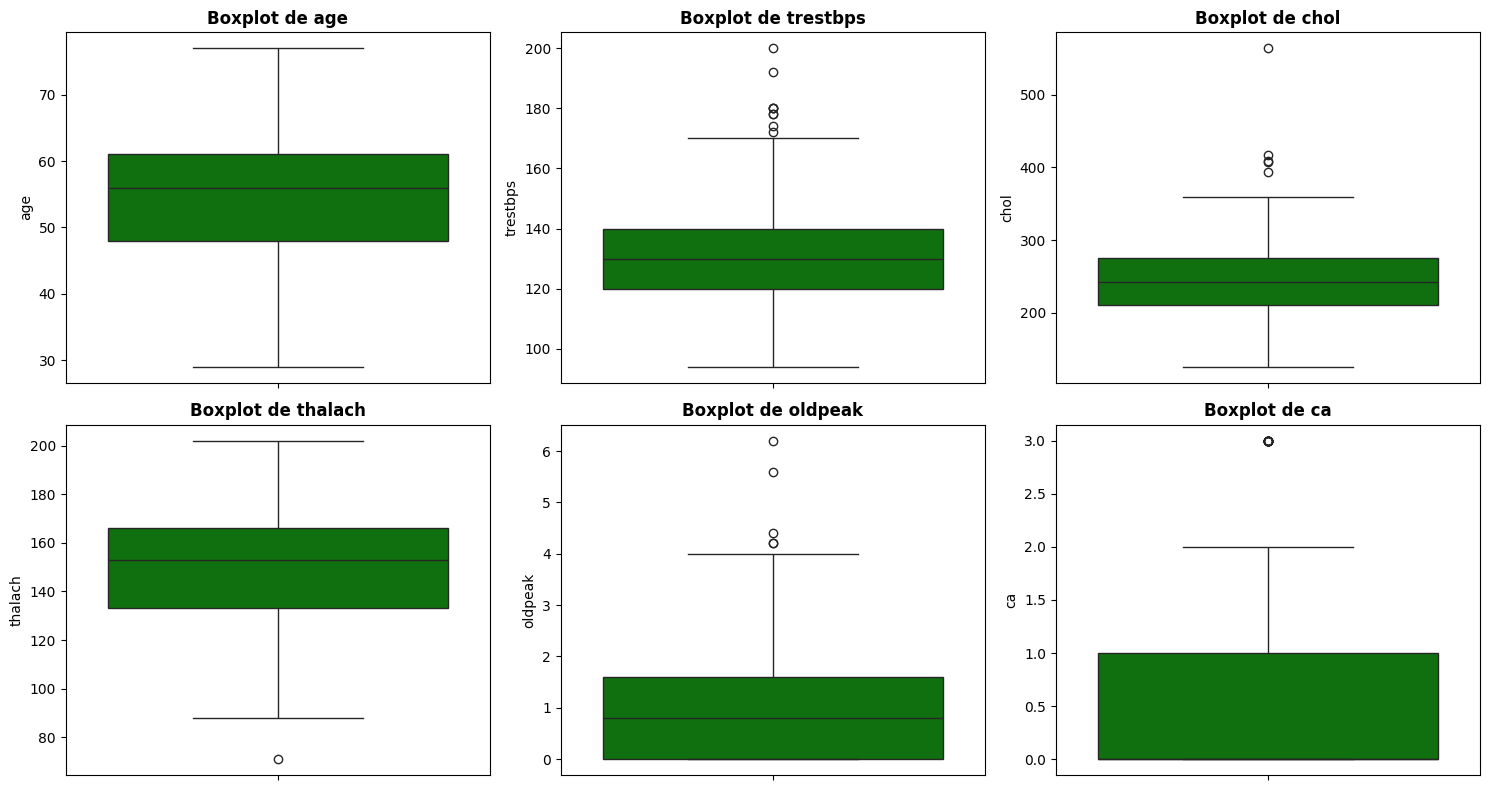

In [6]:
# Seleciona apenas as vari√°veis num√©ricas do DataFrame
numericas = df.select_dtypes(include=['int64', 'float64'])

# Cria um boxplot separado para cada vari√°vel num√©rica
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(numericas.columns):
    sns.boxplot(y=numericas[col], ax=axes[i], color='green')
    axes[i].set_title(f'Boxplot de {col}', fontweight='bold')

plt.tight_layout()
plt.show()

*Gr√°fico 1 - Boxplot das condi√ß√µes cl√≠nicas*

Ao analizar o gr√°fico 1 dos boxplot das caracter√≠sticas cl√≠nicas, pode-se concluir:
- A vari√°vel age apresenta distribui√ß√£o aproximadamente sim√©trica, sem ocorr√™ncia de valores at√≠picos (outliers), indicando uma dispers√£o equilibrada dos dados em torno da mediana;
- As vari√°veis trestbps, chol, thalach, oldpeak e ca revelam distribui√ß√µes assim√©tricas das informa√ß√µes nas figuras. Al√©m disso, nota-se a presen√ßa de valores at√≠picos (Outliers), o que pode indicar variabilidade elevada ou poss√≠veis anomalias nas observa√ß√µes;
- Com base na Tabela 1, verifica-se, pelos boxplots, que a vari√°vel thalach possui outliers nos limites inferiores, enquanto as vari√°veis trestbps, chol, oldpeak e ca apresentam outliers nos limites superiores.


##### 2.3.2 Propor√ß√£o de pessoas pela condi√ß√£o card√≠aca

In [7]:
# Conta os valores da coluna 'condition_label' e adiciona o total
contagem = df["condition_label"].value_counts()
contagem['Total'] = contagem.sum()
print(contagem)

print("-" * 40)
###calculando a propo√ß√£o de cada condi√ß√£o card√≠aca
(df["condition_label"].value_counts(normalize=True) * 100).map("{:.2f}%".format)

condition_label
sem doen√ßa    160
doen√ßa        137
Total         297
Name: count, dtype: int64
----------------------------------------


condition_label
sem doen√ßa    53.87%
doen√ßa        46.13%
Name: proportion, dtype: object

*Tabela 2:  Condi√ß√£o Card√≠aca dos pacientes*

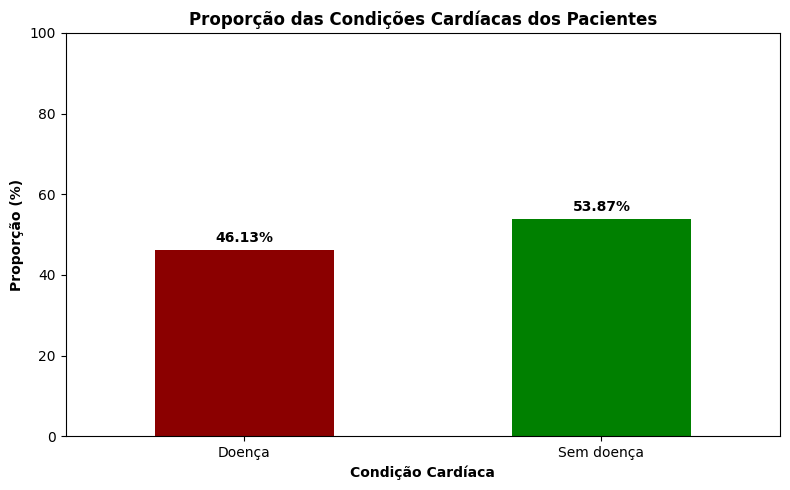

In [8]:
# Gr√°fico de colunas mostrando a propor√ß√£o (%) de cada condi√ß√£o card√≠aca com eixo y de 0 a 100%
proporcao = df['condition_label'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(8, 5))
ax = proporcao.plot(
    kind='bar',
    color=['#8B0000', 'green']
)
ax.set_xticklabels(['Doen√ßa', 'Sem doen√ßa'], rotation=0)
ax.set_xlabel('Condi√ß√£o Card√≠aca', fontweight='bold')
ax.set_ylabel('Propor√ß√£o (%)', fontweight='bold')
ax.set_title('Propor√ß√£o das Condi√ß√µes Card√≠acas dos Pacientes', fontweight='bold')
ax.set_ylim(0, 100)

# Adiciona os valores percentuais nas barras
for i, v in enumerate(proporcao):
    ax.text(i, v + 2, f"{v:.2f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

*Gr√°fico 2: Propor√ß√£o das informa√ß√µes das Condi√ß√µes Card√≠acas dos Pacientes*

Ao analisar o Tabela 2 com Gr√°fico 2, pode-se concluir que:

- A Tabela 2 revela que o conjunto de dados √© composto por 137 pacientes (53,87%) com diagn√≥stico de doen√ßa card√≠aca e 160 pacientes (46,13%) sem a condi√ß√£o card√≠aca.
- J√° o Gr√°fico 2 ilustra de forma visual a distribui√ß√£o das classes, evidenciando um leve desbalanceamento entre os grupos, com uma propor√ß√£o ligeiramente maior de indiv√≠duos sem diagn√≥stico de doen√ßa card√≠aca.

##### 2.3.3 Propor√ß√£o da Condi√ß√£o Card√≠aca por sexo

In [9]:
# Tabela cruzada entre sexo e condi√ß√£o card√≠aca com totais
sexo_condicao_abs = pd.crosstab(df['sex_label'], df['condition_label'], margins=True, margins_name='Total')
print(sexo_condicao_abs)
print("-" * 40)
# Propor√ß√£o entre sexo (linhas) e condi√ß√£o card√≠aca (colunas) com totais, normalizando por coluna
sexo_condicao_prop_col = pd.crosstab(df['sex_label'], df['condition_label'], margins=True, margins_name='Total', normalize='index')
print((sexo_condicao_prop_col * 100).round(2))

condition_label  doen√ßa  sem doen√ßa  Total
sex_label                                 
feminino             25          71     96
masculino           112          89    201
Total               137         160    297
----------------------------------------
condition_label  doen√ßa  sem doen√ßa
sex_label                          
feminino          26.04       73.96
masculino         55.72       44.28
Total             46.13       53.87


*Tabela3: Propor√ß√£o de sexo pela condi√ß√£o card√≠aca*

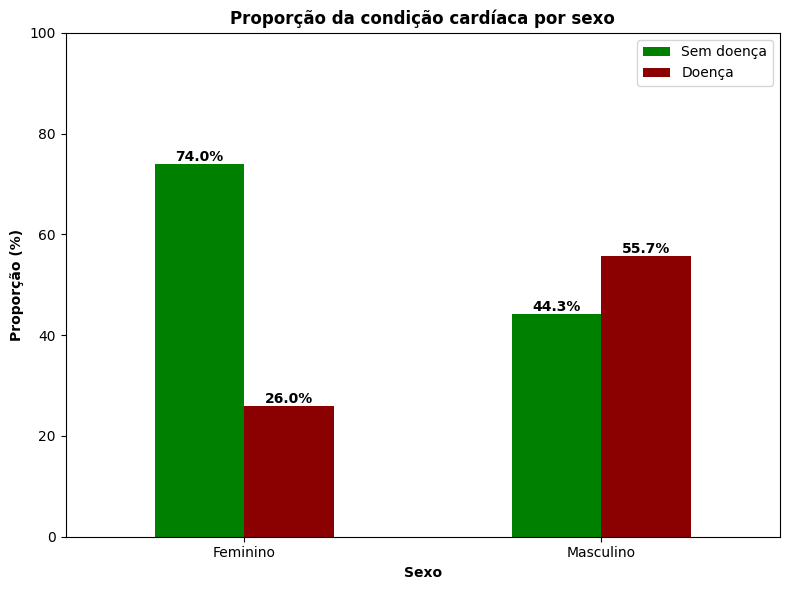

In [10]:
# Gr√°fico de barras agrupadas: propor√ß√£o da condi√ß√£o card√≠aca por sexo
condicao_sexo = pd.crosstab(df['sex_label'], df['condition_label'], normalize='index') * 100

ax = condicao_sexo[['sem doen√ßa', 'doen√ßa']].plot(
    kind='bar',
    color=['green', '#8B0000'],
    figsize=(8, 6)
)
ax.set_xlabel('Sexo', fontweight='bold')
ax.set_ylabel('Propor√ß√£o (%)', fontweight='bold')
ax.set_title('Propor√ß√£o da condi√ß√£o card√≠aca por sexo', fontweight='bold')
ax.set_xticklabels(['Feminino', 'Masculino'], rotation=0)
ax.set_ylim(0, 100)
ax.legend(['Sem doen√ßa', 'Doen√ßa'])

# Adiciona os valores percentuais nas barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


*Gr√°fico 3: Propor√ß√£o de sexo pela condi√ß√£o card√≠aca*

Ao analisar o Tabela 3 com a Gr√°fico 3, pode-se concluir que:

- No grupo de pacientes com doen√ßa card√≠aca, temos cerca de 26,0% pacientes do sexo feminino (25) que salta para 55,7% dos pacientes do sexo masculino (112);
- No grupo de pacientes sem doen√ßas card√≠aca, temos 74,0% dos pacientes do sexo masculino (89) que decai para 44,3% dos pacientes do sexo feminino (71).  

##### 2.3.4 Press√£o Arterial em Repouso em fun√ß√£o da idade e condi√ß√£o card√≠aca

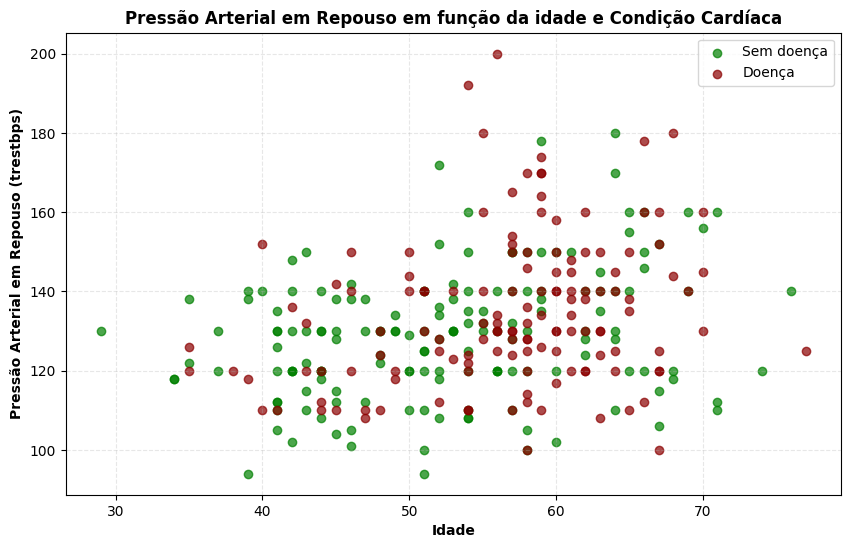

In [11]:
# Gr√°fico de dispers√£o: idade (age) vs press√£o arterial em repouso (trestbps), colorido por condi√ß√£o card√≠aca
cores = {'doen√ßa': '#8B0000', 'sem doen√ßa': 'green'}

plt.figure(figsize=(10, 6))
for cond in df['condition_label'].unique():
    subset = df[df['condition_label'] == cond]
    plt.scatter(
        subset['age'],
        subset['trestbps'],
        color=cores[cond],
        label=cond.capitalize(),
        alpha=0.7
    )

plt.xlabel('Idade', fontweight='bold')
plt.ylabel('Press√£o Arterial em Repouso (trestbps)', fontweight='bold')
plt.title('Press√£o Arterial em Repouso em fun√ß√£o da idade e Condi√ß√£o Card√≠aca', fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

*Gr√°fico 4: Press√£o Arterial em Repouso em fun√ß√£o da idade e Condi√ß√£o Card√≠aca*

An√°lise do Gr√°fico 4 das pessoas com press√£o arterial em repouso:

- Pacientes com doen√ßa card√≠aca (em vermelho) est√£o distribu√≠dos de forma ampla tanto nas idades quanto nos n√≠veis de press√£o arterial em repouso, mas h√° uma leve concentra√ß√£o entre 50 e 70 anos com press√µes acima de 130 bps.
- Pacientes sem doen√ßa card√≠aca (verde) est√£o igualmente espalhados, mas um n√∫mero consider√°vel aparece com press√£o arterial entre 120‚Äì140 bps, especialmente entre 40 e 60 anos.
- Identificam-se dois pacientes sem diagn√≥stico de doen√ßa card√≠aca com press√£o arterial inferior a 100 bps e tr√™s pacientes apresentam press√£o arterial em repouso entre 180 e 200 bps com diagn√≥stico de doen√ßa card√≠aca, estes quais podem ser considerados valores at√≠picos (outliers).


##### 2.3.5 Doen√ßa card√≠aca em fun√ß√£o da idade e da frequ√™ncia card√≠aca m√°xima

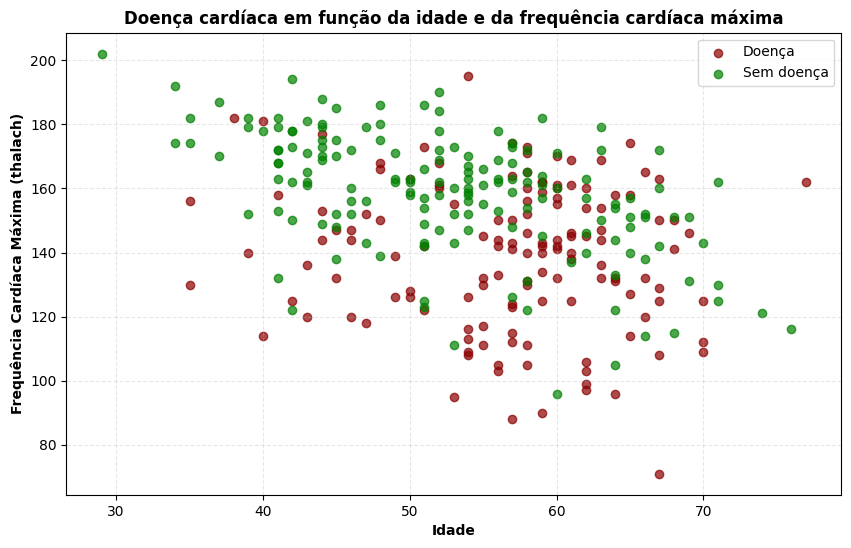

In [12]:
# Plotando age vs thalach para cada condi√ß√£o card√≠aca com cores diferentes
plt.figure(figsize=(10, 6))
plt.scatter(
    df[df['condition_label'] == 'doen√ßa']['age'],
    df[df['condition_label'] == 'doen√ßa']['thalach'],
    color='#8B0000', label='Doen√ßa', alpha=0.7  # vermelho escuro
)
plt.scatter(
    df[df['condition_label'] == 'sem doen√ßa']['age'],
    df[df['condition_label'] == 'sem doen√ßa']['thalach'],
    color='green', label='Sem doen√ßa', alpha=0.7  # verde
)
plt.xlabel('Idade', fontweight='bold')
plt.ylabel('Frequ√™ncia Card√≠aca M√°xima (thalach)', fontweight='bold')
plt.title('Doen√ßa card√≠aca em fun√ß√£o da idade e da frequ√™ncia card√≠aca m√°xima', fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

*Gr√°fico 5: Doen√ßa card√≠aca em fun√ß√£o da idade e da frequ√™ncia card√≠aca m√°xima*

An√°lise do Gr√°fico 5 das pessoas com press√£o arterial m√°xima:
- Pacientes com doen√ßa card√≠aca (vermelho) tendem a estar mais concentrados nas faixas et√°rias intermedi√°rias a avan√ßadas (acima de 50 anos) e se concentram com frequ√™ncia card√≠aca m√°xima entre 80 at√© 180 bps;
- Pacientes sem doen√ßa card√≠aca (verde) se distribuem de maneira mais homog√™nea entre as faixas et√°rias, embora tamb√©m predominem em idades m√©dias.
- Indiv√≠duos sem doen√ßa card√≠aca parecem apresentar, em m√©dia, frequ√™ncia card√≠aca m√°xima mais alta, especialmente entre os mais jovens;
- Observam-se alguns pontos isolados em ambos os extremos do gr√°fico, tanto em termos de idade (entre 60 at√© 70 anos paciente com doen√ßa card√≠aca) quanto de frequ√™ncia card√≠aca (abaixo de 30 anos, paciente sem doen√ßa card√≠aca), que podem representar casos at√≠picos (Outiliers).


##### 2.3.6 Condi√ß√£o Card√≠aca em fun√ß√£o da idade e do colesterol total

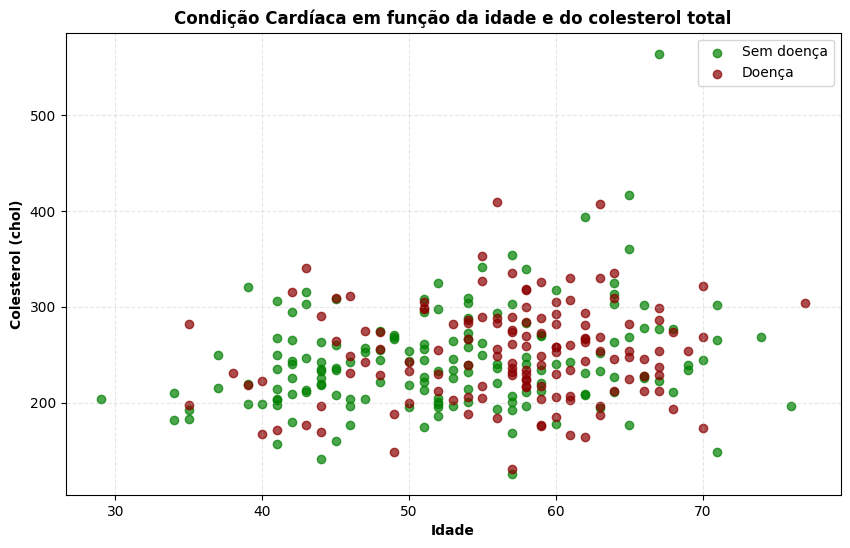

In [13]:
# Gr√°fico de dispers√£o: colesterol (chol) vs idade (age), colorido por condi√ß√£o card√≠aca
plt.figure(figsize=(10, 6))
for cond in df['condition_label'].unique():
    subset = df[df['condition_label'] == cond]
    plt.scatter(
        subset['age'],
        subset['chol'],
        color=cores[cond],
        label=cond.capitalize(),
        alpha=0.7
    )

plt.xlabel('Idade', fontweight='bold')
plt.ylabel('Colesterol (chol)', fontweight='bold')
plt.title('Condi√ß√£o Card√≠aca em fun√ß√£o da idade e do colesterol total', fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

*Gr√°fico 6: Condi√ß√£o Card√≠aca em fun√ß√£o da idade e do colesterol total*

De acordo com An√°lise do Gr√°fico 6, pode-se concluir:

- Os n√≠veis de colesterol variam amplamente, concentrando-se entre 200 e 400 mg/dl, com alguns pacientes atingindo valores acima de 400 mg/dl;
- Pacientes com doen√ßa card√≠aca (vermelhos) est√£o distribu√≠dos por toda a faixa de idade, mas nota-se uma maior concentra√ß√£o em idades entre 50 e 70 anos, muitas vezes com n√≠veis de colesterol acima de 200 mg/dl;
- J√° os sem a condi√ß√£o (verdes) tamb√©m est√£o presentes em todas as faixas et√°rias, por√©m tendem a ter valores mais concentrados entre 200 e 300 mg/dl, com alguns casos com colesterol elevado, mas menos frequentes;
- Acima da faixa de 500 mg/dl, existe um ponto at√≠pico (Outliers) de paciente com colesterol elevado mas sem doen√ßa card√≠aca, e mais dois pontos at√≠picos (Outliers) abaixo de 100 mg/dl de pacientes com e sem doen√ßa card√≠aca.

##### 2.3.7 Propor√ß√£o de condi√ß√£o card√≠aca pela dor induzida pelo exerc√≠cio f√≠sico

In [14]:
# Tabela de barras agrupadas: exang_label vs condition_label (valores absolutos)
exang_condition = pd.crosstab(df['exang_label'], df['condition_label'])
print("Tabela de valores absolutos:")
display(exang_condition)
print("-" * 40)
# Tabela de propor√ß√µes por linha
exang_condition_prop = pd.crosstab(df['exang_label'], df['condition_label'], normalize='index')
print("\nTabela de propor√ß√µes por linha (%):")
display(exang_condition_prop.applymap(lambda x: f"{x:.2%}"))

Tabela de valores absolutos:


condition_label  doen√ßa  sem doen√ßa
exang_label                        
n√£o                  63         137
sim                  74          23

----------------------------------------

Tabela de propor√ß√µes por linha (%):


condition_label  doen√ßa sem doen√ßa
exang_label                       
n√£o              31.50%     68.50%
sim              76.29%     23.71%

*Tabela 4: Distribui√ß√£o da condi√ß√£o card√≠aca pela dor induzida pelo exerc√≠cio f√≠sico*

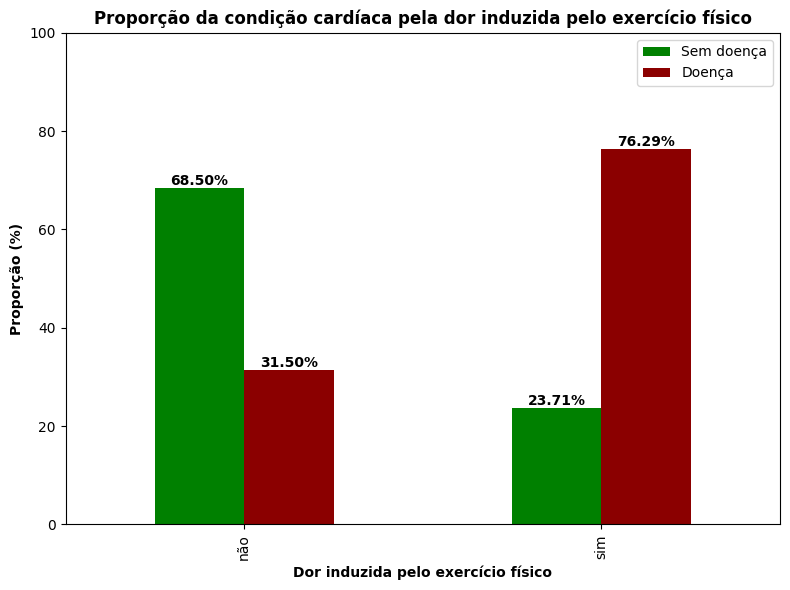

In [15]:
# Gr√°fico de propor√ß√£o de barras agrupadas: exang_label vs condition_label com eixo y de 0 a 100%
exang_condition_prop = pd.crosstab(df['exang_label'], df['condition_label'], normalize='index') * 100

ax = exang_condition_prop[['sem doen√ßa', 'doen√ßa']].plot(
    kind='bar',
    color=['green', '#8B0000'],
    figsize=(8, 6)
)
ax.set_xlabel('Dor induzida pelo exerc√≠cio f√≠sico', fontweight='bold')
ax.set_ylabel('Propor√ß√£o (%)', fontweight='bold')
ax.set_title('Propor√ß√£o da condi√ß√£o card√≠aca pela dor induzida pelo exerc√≠cio f√≠sico', fontweight='bold')
ax.set_ylim(0, 100)
ax.legend(['Sem doen√ßa', 'Doen√ßa'])

# Adiciona os valores percentuais nas barras
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}%",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontweight='bold'
    )

plt.tight_layout()
plt.show()

*Gr√°fico 7: Distribui√ß√£o de Condi√ß√£o Card√≠aca pela dor induzida pelo exerc√≠cio f√≠sico*

- De acordo com a tabela 4 e o Gr√°fico 7, os pacientes que n√£o relataram dor induzida pelo exerc√≠cio f√≠sico constituem o maior grupo: 137 (68,5%) sem doen√ßa card√≠aca e 63 (31,5%) com a doen√ßa card√≠aca;
- Pacientes que relataram dor induzida pelo exerc√≠cio f√≠sico, a maioria apresenta diagn√≥stico de doen√ßa card√≠aca: 74 (76,29%) pacientes com a doen√ßa card√≠aca versus 23 (23,71%) pacientes sem a doen√ßa card√≠aca.

##### 2.3.8 M√©dia da condi√ß√£o card√≠aca induzida pela depres√£o ocasionada pelo exerc√≠cio f√≠sico

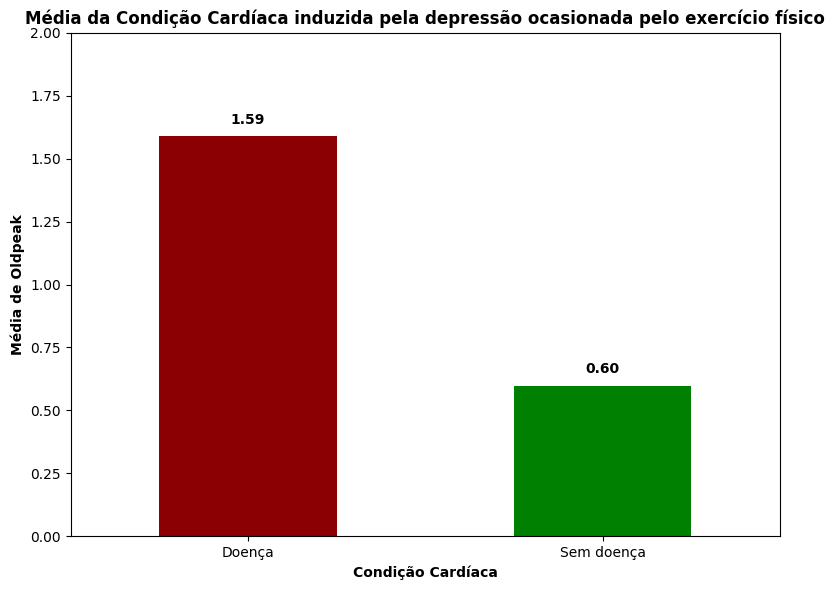

In [16]:
# Gr√°fico de barras: m√©dia de oldpeak por condi√ß√£o card√≠aca com eixo y at√© 2
oldpeak_means = df.groupby('condition_label')['oldpeak'].mean().reindex(['doen√ßa', 'sem doen√ßa'])

ax = oldpeak_means.plot(
    kind='bar',
    color=[cores['doen√ßa'], cores['sem doen√ßa']],
    figsize=(8, 6)
)
ax.set_xlabel('Condi√ß√£o Card√≠aca', fontweight='bold')
ax.set_ylabel('M√©dia de Oldpeak', fontweight='bold')
ax.set_title('M√©dia da Condi√ß√£o Card√≠aca induzida pela depress√£o ocasionada pelo exerc√≠cio f√≠sico', fontweight='bold')
ax.set_xticklabels(['Doen√ßa', 'Sem doen√ßa'], rotation=0)
ax.set_ylim(0, 2)

# Adiciona os valores nas barras
for i, v in enumerate(oldpeak_means):
    ax.text(i, v + 0.05, f"{v:.2f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

*Gr√°fico 8: M√©dia da Condi√ß√£o Card√≠aca induzida pela depres√£o ocasionada pelo exerc√≠cio f√≠sico*

Analisando o Gr√°fico 8, temos:
- Uma diferen√ßa marcante nos n√≠veis m√©dios de depress√£o induzida por exerc√≠cio f√≠sico (Oldpeak) entre indiv√≠duos com e sem doen√ßa card√≠aca;
- Pessoas com doen√ßa card√≠aca apresentaram uma m√©dia de 1,59, significativamente mais alta, e as pessoas sem doen√ßa card√≠aca tiveram m√©dia de 0,60, o que sugere menor altera√ß√£o na condi√ß√£o card√≠aca durante o esfor√ßo f√≠sico.


##### 2.3.9 Propor√ß√£o do tipo de dor tor√°cica pela condi√ß√£o card√≠aca

In [17]:
# Tabela cruzada entre cp_label e condition_label
tabela_cp_condition = pd.crosstab(df['cp_label'], df['condition_label'])
tabela_cp_condition

condition_label                                     doen√ßa  sem doen√ßa
cp_label                                                              
angina at√≠pica (dor no peito, n√£o relacionada a...       9          40
angina t√≠pica (dor no peito tipica)                      7          16
assintom√°tico (dor toraxica, sem sinais da doen√ßa)     103          39
dor n√£o anginosa (espasmos, n√£o relacionados ao...      18          65

*Tabela 5: Distribui√ß√£o do tipo de dor tor√°cica pela condi√ß√£o card√≠aca*

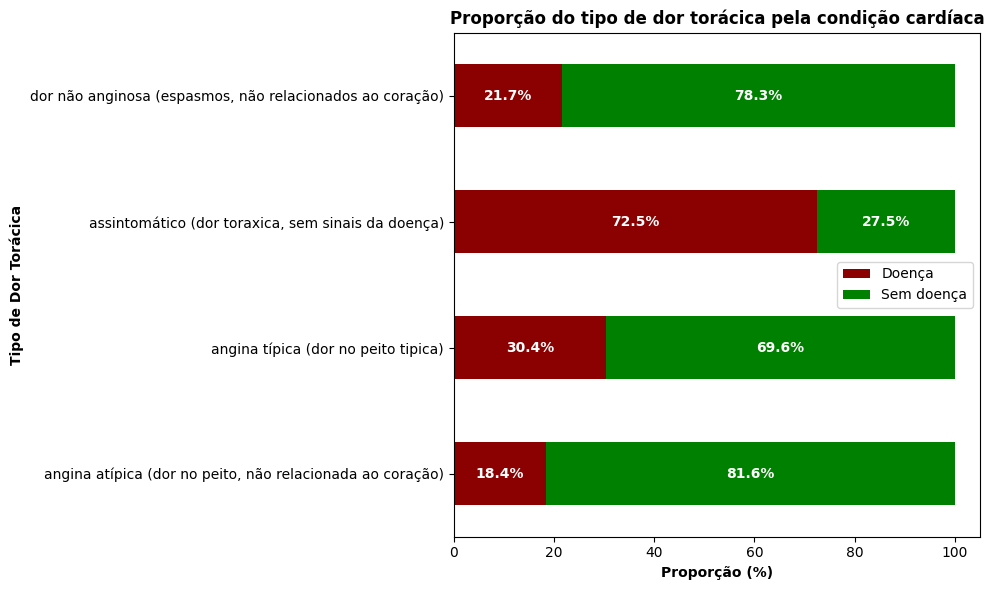

In [18]:
# Calcula a propor√ß√£o (%) de cada valor de 'cp_label' por 'condition_label'
cp_condition_prop = pd.crosstab(df['cp_label'], df['condition_label'], normalize='index') * 100

# Garante a ordem das colunas para o gr√°fico
colunas_ordem = ['doen√ßa', 'sem doen√ßa'] if 'doen√ßa' in cp_condition_prop.columns else cp_condition_prop.columns

# Cores para as barras
cores = ['#8B0000', 'green']

# Plota o gr√°fico de barras empilhadas horizontal
ax = cp_condition_prop[colunas_ordem].plot(
    kind='barh',
    stacked=True,
    color=cores,
    figsize=(10, 6)
)
plt.xlabel('Propor√ß√£o (%)', fontweight='bold')
plt.ylabel('Tipo de Dor Tor√°cica', fontweight='bold')
plt.title('Propor√ß√£o do tipo de dor tor√°cica pela condi√ß√£o card√≠aca', fontweight='bold')
plt.legend(['Doen√ßa', 'Sem doen√ßa'])

# Adiciona os valores percentuais nas barras
for i, (idx, row) in enumerate(cp_condition_prop[colunas_ordem].iterrows()):
    left = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(left + val / 2, i, f"{val:.1f}%", va='center', ha='center', color='white', fontweight='bold')
        left += val

plt.tight_layout()
plt.show()

##### 2.3.10 Distribui√ß√£o de vasos principais comprometidos por condi√ß√£o card√≠aca

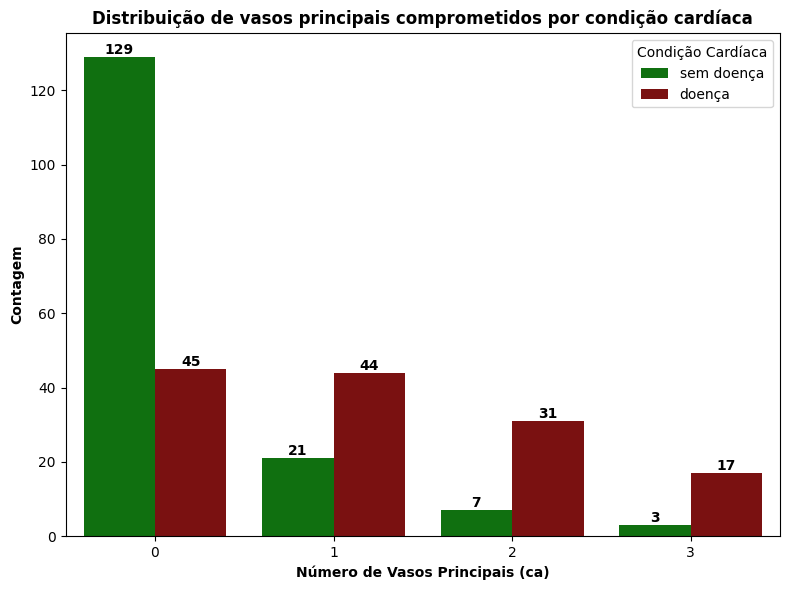

In [19]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='ca', hue='condition_label', palette=['green','#8B0000'])
plt.xlabel('N√∫mero de Vasos Principais (ca)', fontweight='bold')
plt.ylabel('Contagem', fontweight='bold')
plt.title('Distribui√ß√£o de vasos principais comprometidos por condi√ß√£o card√≠aca', fontweight='bold')
plt.legend(title='Condi√ß√£o Card√≠aca')

# Adiciona os valores nas barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontweight='bold', color='black')

plt.tight_layout()
plt.show()

*Gr√°fico 10: Distribui√ß√£o de vasos principais comprometidos por condi√ß√£o card√≠aca*

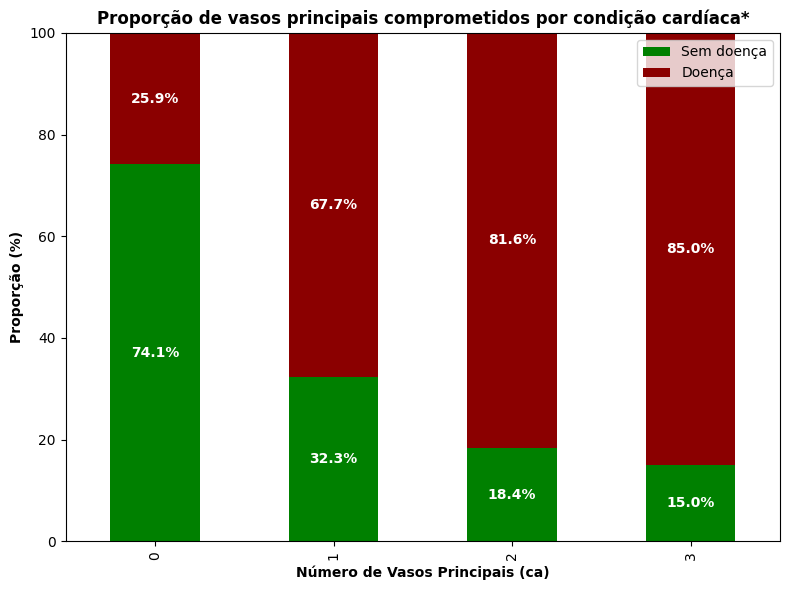

In [20]:
# Calcula a propor√ß√£o (%) de cada valor de 'ca' por 'condition_label'
ca_condition_prop = pd.crosstab(df['ca'], df['condition_label'], normalize='index') * 100

# Plota o gr√°fico de barras empilhadas
ax = ca_condition_prop[['sem doen√ßa', 'doen√ßa']].plot(
    kind='bar',
    stacked=True,
    color=['green','#8B0000'],
    figsize=(8, 6)
)
ax.set_xlabel('N√∫mero de Vasos Principais (ca)', fontweight='bold')
ax.set_ylabel('Propor√ß√£o (%)', fontweight='bold')
ax.set_title('Propor√ß√£o de vasos principais comprometidos por condi√ß√£o card√≠aca*', fontweight='bold')
ax.set_ylim(0, 100)
ax.legend(['Sem doen√ßa', 'Doen√ßa'])

# Adiciona os valores percentuais nas barras
for i, row in enumerate(ca_condition_prop[['sem doen√ßa', 'doen√ßa']].values):
    bottom = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(i, bottom + val / 2, f"{val:.1f}%", ha='center', va='center', color='white', fontweight='bold')
        bottom += val

plt.tight_layout()
plt.show()

*Gr√°fico 11: Propor√ß√£o de vasos principais comprometidos por condi√ß√£o card√≠aca*

Analisando o Gr√°fico 10 e o Gr√°fico 11, pode-se concluir que:

- As pessoas que n√£o tem doen√ßa card√≠aca, com zero vazos tem maior propor√ß√£o (129 casos; 74,1%) do que em rela√ß√£o as pessoas com doen√ßa card√≠aca (45 casos; 25,9%);
- A medida que o n√∫mero de vasos principais comprometidos aumenta (1 at√© 3 vasos comprometidos), temos um aumento vertiginoso de pessoas com doen√ßa card√≠aca (de 67,7% (44 casos) com 1 vaso comprometido at√© 85% (17 casos), em 3 vasos comprometidos) do que em rela√ß√£o as pessoas sem doen√ßa card√≠aca que decai a propor√ß√£o (de 32,3% (21 casos) com 1 vaso comprometido at√© 15,0% (3 casos), em 3 vasos comprometidos), e isso, refor√ßa o comprometimento de mu√∫ltiplos vasos comprometidos de pessosas com problemas card√≠acos;


##### 2.3.11 Matriz de correla√ß√£o das condi√ß√µes cl√≠nicas


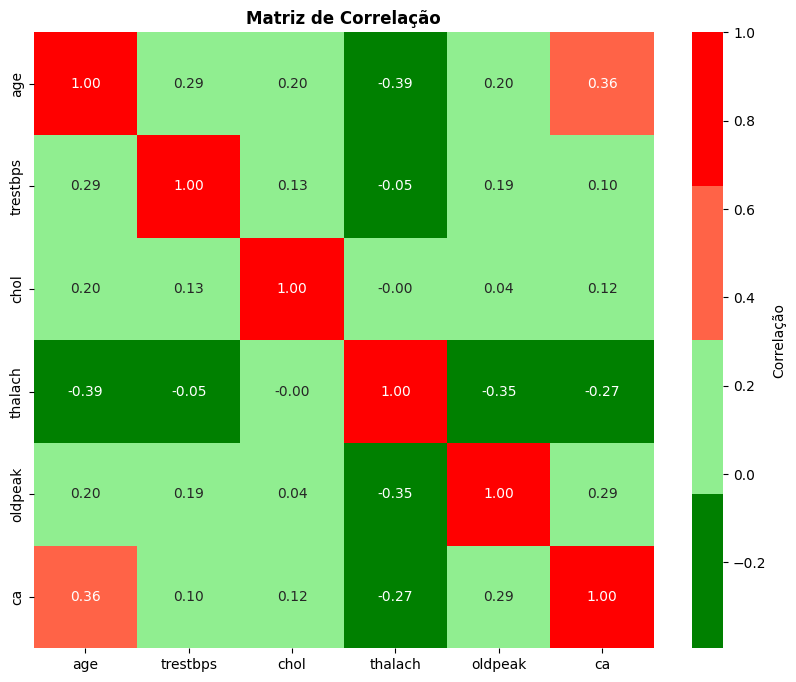

In [21]:
# Matriz de correla√ß√£o apenas para vari√°veis num√©ricas
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap=["green", "lightgreen", "#FF6347", "red"],
    cbar_kws={'label': 'Correla√ß√£o'}
)
plt.title('Matriz de Correla√ß√£o', fontweight='bold')
plt.show()

*Gr√°fico 12: Matriz de Correla√ß√£o das condi√ß√µes cl√≠nicas*

Analisando o Gr√°fico 12 referente a matriz de correla√ß√£o das condi√ß√µes cl√≠nicas, t√™m-se:
- N√£o existe uma correla√ß√£o forte e fraca entre as vari√°veis cl√≠nicas;

*Idade (age)*

- Possui uma correla√ß√£o fraca positiva com n√∫mero de vasos principais (ca = 0,36) e press√£o arterial em repouso (trestbps = 0,29),depress√£o induzida pelo exerc√≠cio (Oldpeak = 0,20) e colesterol alto (chol = 0,20);
- Correla√ß√£o fraca negativa com frequ√™ncia card√≠aca m√°xima (thalach = -0,39);

*Press√£o arterial em repouso (trestbps)*
- Correlaciona fracamente com age (0,29), mas pouco com outros fatores.

*Colesterol total (chol)*
- Com a vari√°vel age (0,20) tem correla√ß√£o fraca positiva e o restante das condi√ß√µes cl√≠nicas tem discretas correla√ß√µes;

*M√°xima frequ√™ncia card√≠aca (thalach)*
- Fraca correla√ß√£o negativa com age (-0,39) e oldpeak (-0,35) e ca (-0,27) e o restante das condi√ß√µes cl√≠nicas tem discretas correla√ß√µes;

*Depress√£o induzida pelo exercicio (oldpeak)*
- Fraca correla√ß√£o negativa entre age (0,20) e ca (0,29) e o restante das condi√ß√µes cl√≠nicas tem discretas correla√ß√µes;

*N√∫mero de vasos principais (ca)*
- Fraca correla√ß√£o positiva age (0,36) e oldpeak (0,29) e negativa thalach (-0,27) e o restante das condi√ß√µes cl√≠nicas tem discretas correla√ß√µes;

Com as an√°lises de cada vari√°vel:
- Vari√°veis centrais para modelos de predi√ß√£o de doen√ßa card√≠aca s√£o: *age, thalach, oldpeak e ca*;
- Vari√°vel age se correlaciona com todas as outras vari√°veis cl√≠nicas;
- As vari√°veis *chol e trestbps* possuem correla√ß√µes menos brandas, ent√£o podem ter pouca preditivade com as outras vari√°veis cl√≠nicas com menos itera√ßoes.

*O pr√≥ximo passo √© realizar o processo de limpeza para a etapa de pr√©-processamento de dados.*

# 3. Pr√©-Processamento de Dados e Prepara√ß√£o dos Dados

- Nesta etapa, realizaremos a limpeza e a organiza√ß√£o do dataset antes da modelagem. Essa fase √© essencial para o desenvolvimento de modelos preditivos confi√°veis.
- Como o conjunto de dados Heart Disease Cleveland UCI n√£o apresenta valores ausentes, n√£o foi necess√°rio aplicar t√©cnicas de imputa√ß√£o de missing values.
- Mesmo assim, confirmaremos por meio de an√°lise descritiva se existem valores nulos ou inconsist√™ncias que demandem tratamento.
- Por fim, dividiremos o dataset em conjuntos de treino e teste, avaliaremos a aplica√ß√£o de valida√ß√£o cruzada e, em seguida, aplicaremos o tratamento de outliers (tratamento dos dados) para que valores extremos n√£o comprometam as infer√™ncias do modelo na pr√≥xima etapa.


##### 3.1 Tratamento de valores nulos

Nesta etapa, iremos verificar, se as condi√ß√µes cl√≠nica do dataset Heart Disease Cleveland UCI possui valores nulos, pois √© importante na defini√ß√£o de exclus√£o de linhas, e influi no preenchimento m√©dia/mediana/moda.

In [22]:
# Verificar a presen√ßa de valores nulos no dataset original
print("Valores nulos no dataset Iris:")
df.isnull().sum()

Valores nulos no dataset Iris:


age                0
trestbps           0
chol               0
thalach            0
oldpeak            0
ca                 0
sex_label          0
cp_label           0
fbs_label          0
restecg_label      0
exang_label        0
slope_label        0
thal_label         0
condition_label    0
dtype: int64

*Tabela 6: Valores nulos das condi√ß√µes cl√≠nicas*


De acordo com a tabela 6, o dataset Heart Disease Cleveland UCI n√£o possui valores nulos.

##### 3.2 Treino e Teste

In [23]:
###criando variaveis categ√≥ricas com labels das vari√°veis originais

# Cria os labels para a coluna 'condition'
condition = {
    "doen√ßa" :1,
    "sem doen√ßa" : 0,

}

df['condition'] = df['condition_label'].map(condition)
df[['condition', 'condition_label']].head()

##labels da coluna Sex
sex = {
    "masculino" :1,
    "feminino" : 0,

}

df['sex'] = df['sex_label'].map(sex)
df[['sex', 'sex_label']].head()

# Cria os labels para a coluna 'cp'
cp = {
    "angina t√≠pica (dor no peito tipica)" :0,
    "angina at√≠pica (dor no peito, n√£o relacionada ao cora√ß√£o)" : 1,
    "dor n√£o anginosa (espasmos, n√£o relacionados ao cora√ß√£o)" : 2,
    "assintom√°tico (dor toraxica, sem sinais da doen√ßa)" :3
}

df['cp'] = df['cp_label'].map(cp)
df[['cp', 'cp_label']].head()


# Cria a coluna de labels para a vari√°vel 'fbs'
df['fbs'] = df['fbs_label'].map({'verdadeiro' :0, 'falso' :1})
df[['fbs', 'fbs_label']].head()


# Cria a coluna de labels para a vari√°vel 'restecg'
restecg = {
    "normal" :0,
    "com anormalidade da onda ST-T (invers√µes da onda T e/ou supradesnivelamento ou infradesnivelamento do segmento ST > 0,05 mV)" :1,
    "apresentando hipertrofia ventricular esquerda prov√°vel ou definitiva pelos crit√©rios de Estes" :2
}

df['restecg'] = df['restecg_label'].map(restecg)
df[['restecg', 'restecg_label']].head()


# Cria a coluna de labels para a vari√°vel 'exang'
df['exang'] = df['exang_label'].map({'sim' :1, 'n√£o' :0})
df[['exang', 'exang_label']].head()


# Cria os labels para a coluna 'slope'
slope = {
    "ascendente" :0,
    "plano"      :1,
    "descida"    :2
}

df['slope'] = df['slope_label'].map(slope)
df[['slope', 'slope_label']].head()


# Cria os labels para a coluna 'thal'
thal = {
    "normal"              :0,
    "defeito corrigido"   :1,
    "defeito revers√≠vel"  :2
}

df['thal'] = df['thal_label'].map(thal)
df[['thal', 'thal_label']].head()



####excluindo as colunas originais
df = df.drop(columns=[ 'sex_label','cp_label', 'fbs_label', 'restecg_label', 'exang_label', 'slope_label', 'thal_label', 'condition_label'])
df.head(5)

age  trestbps  chol  thalach  oldpeak  ca  condition  sex  cp  fbs  \
0   69       160   234      131      0.1   1          0    1   0    0   
1   69       140   239      151      1.8   2          0    0   0    1   
2   66       150   226      114      2.6   0          0    0   0    1   
3   65       138   282      174      1.4   1          1    1   0    0   
4   64       110   211      144      1.8   0          0    1   0    1   

   restecg  exang  slope  thal  
0        2      0      1     0  
1        0      0      0     0  
2        0      0      2     0  
3        2      0      1     0  
4        2      1      1     0

- **obs: Como os modelos de machine learning como regress√£o log√≠stica, √°rvores de decis√£o, SVM, etc., geralmente n√£o conseguem lidar com strings diretamente. Eles esperam que todas as vari√°veis de entrada (X_train, X_test) sejam num√©ricas. Ent√£o, antes de realizar o Treino e Teste referente ao dataset Heart Disease Cleveland UCI, foi necess√°rio converter as vari√°veis categ√≥ricas em num√©ricas**


In [24]:
# Separar features (X) e target (y)
X = df.drop('condition', axis=1)
y = df['condition']

# Dividir em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


**An√°lise do Resultado de Treino e Teste do dataset Heart Disease Cleveland da UCI**

- A vari√°vel condition_label √© o alvo (presen√ßa ou aus√™ncia de doen√ßa card√≠aca).
- A estratifica√ß√£o garante que a propor√ß√£o de classes seja mantida em treino e teste


##### 3.2 M√©todo de Valida√ß√£o cruzada

In [25]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

- Ser√° utilizado o m√©todo de valida√ß√£o cruzada, pois o dataset Heart Disease Cleveland da UCI, possui uma amostra de 297 observa√ß√µes, tamanho moderado, com o objetivo de reduzir o risco de overfitting.
- A valida√ß√£o cruzada (como K-Fold) ajuda a garantir que o modelo seja avaliado de forma mais robusta, usando diferentes divis√µes dos dados.



##### 3.3 Transforma√ß√£o dos dados


Abaixo ser√° feito o tratamento dos dados observados nas vari√°veis cl√≠nicas. Para esse tratamento, foi feito:

- Normaliza√ß√£o pela M√©dia;
- Normaliza√ß√£o pela Mediana;
- Transforma√ß√£o de Box-Cox;
- Remo√ß√£o de Outliers.

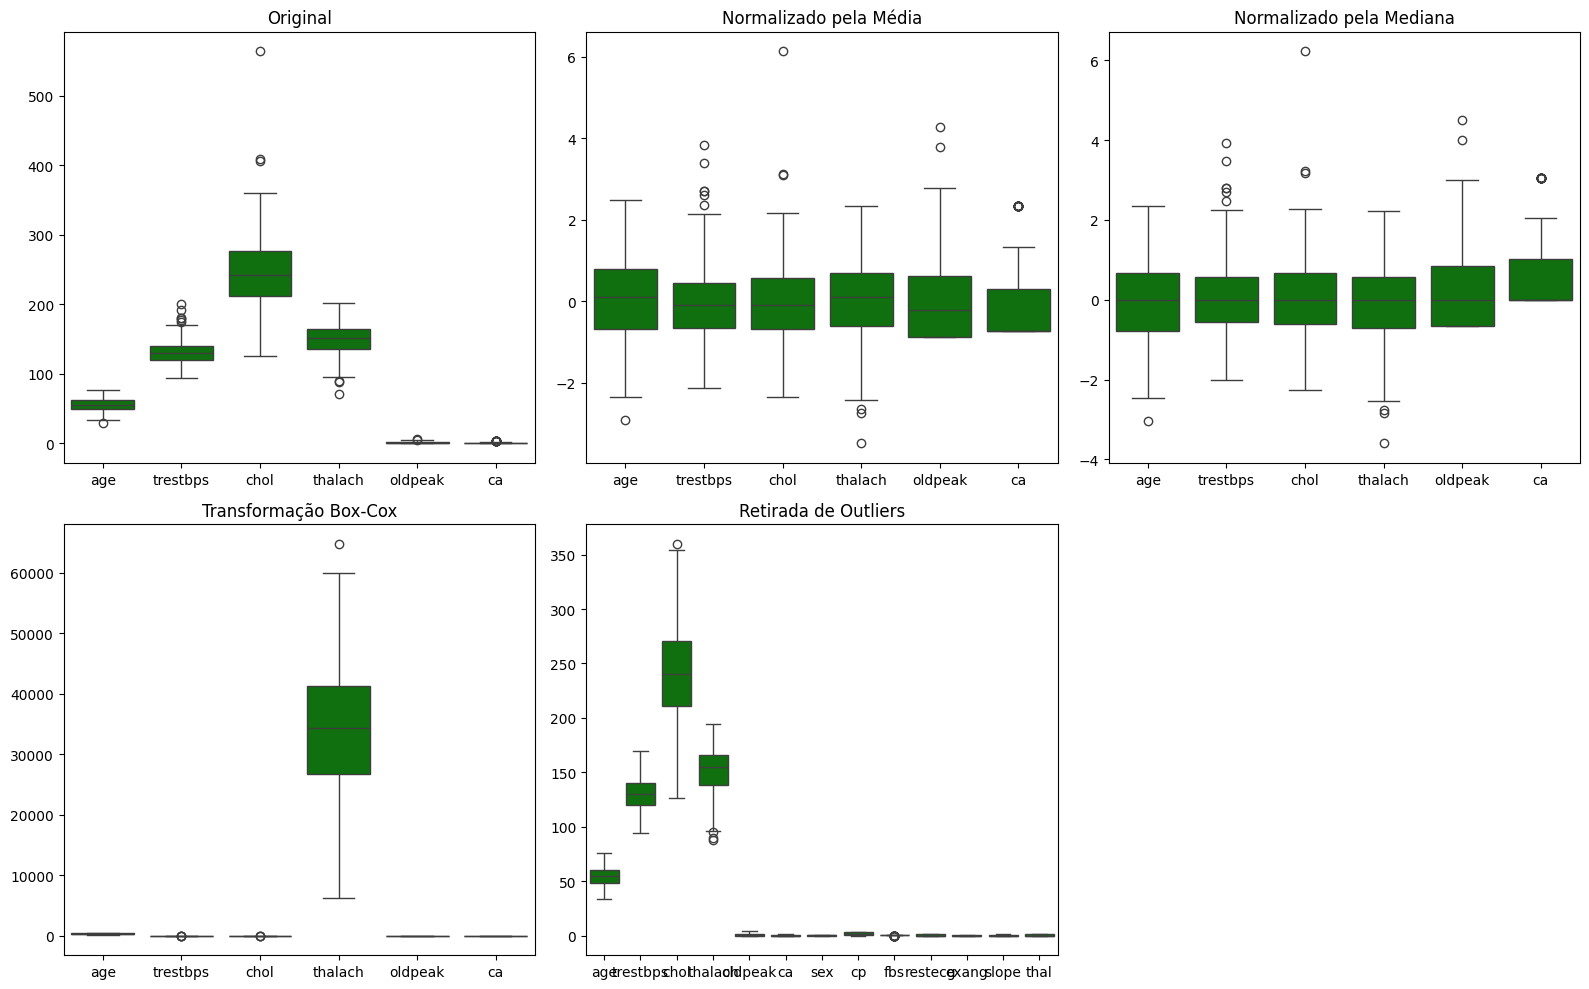

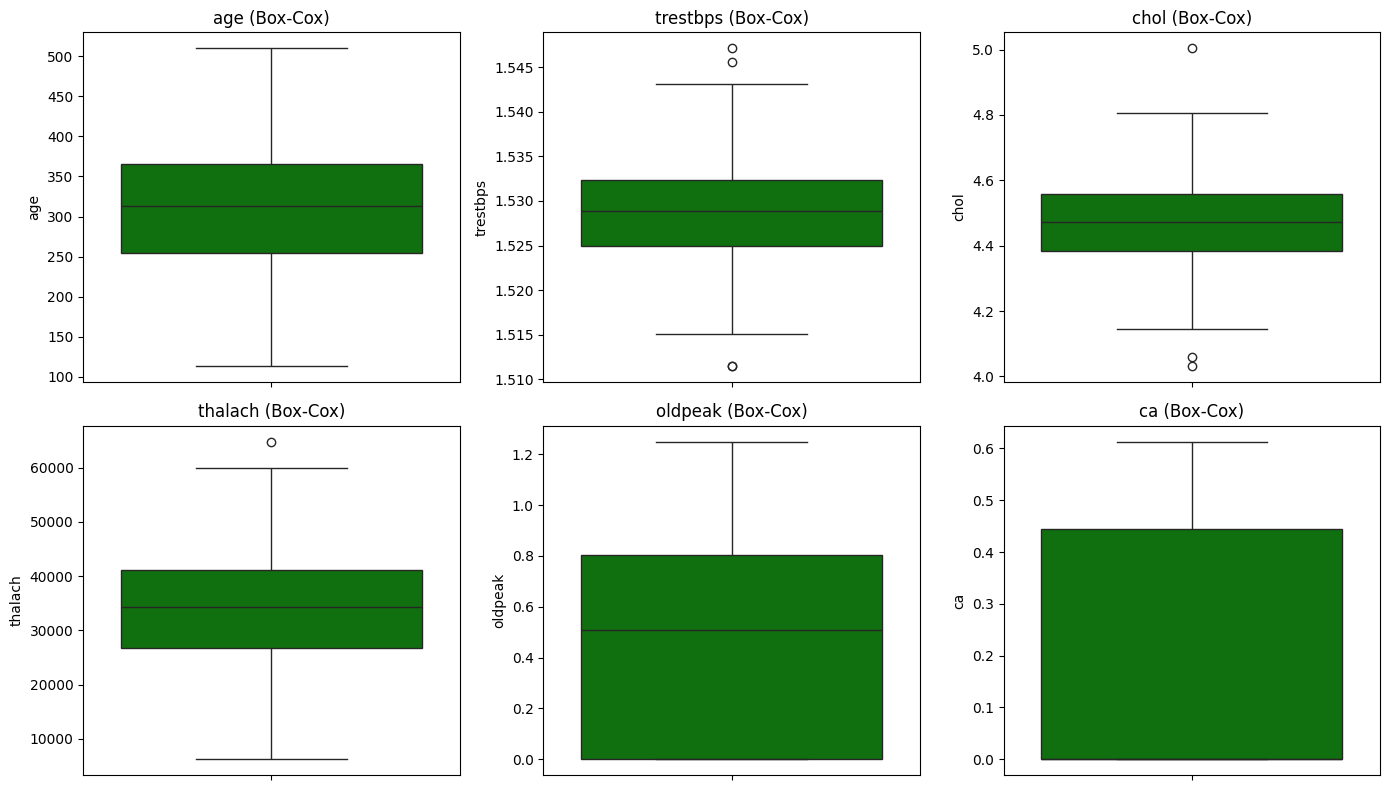

In [26]:
###### tipos de tratamento para Outliers

# Selecionando apenas colunas num√©ricas das variaveis clinicas para as transforma√ß√µes
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

#normaliza√ß√£o pela media
df_mean = X_train[numeric_cols].apply(lambda x: (x - x.mean()) / x.std())

#normaliza√ß√£o pela mediana
df_median = X_train[numeric_cols].apply(lambda x: (x - x.median()) / x.std())

#Transforma√ß√£o box-cox
df_boxcox = pd.DataFrame()

for col in numeric_cols:
    # Evita valores zero ou negativos
    data = X_train[col].copy()
    if (data <= 0).any():
        data = data + 1  # Ajusta para evitar zeros
    transformed, _ = boxcox(data)
    df_boxcox[col] = transformed


# Removendo Outliers pelo com base no IQR
def remove_outliers_iqr(df, cols):
    df_clean = X_train.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        mask = (df_clean[col] >= Q1 - 1.5 * IQR) & (df_clean[col] <= Q3 + 1.5 * IQR)
        df_clean = df_clean[mask]
    return df_clean

df_outlier_free = remove_outliers_iqr(df, numeric_cols)


#################################plotando os resultados por boxplot
plt.figure(figsize=(16, 10))

# Original
plt.subplot(2, 3, 1)
sns.boxplot(data=X_train[numeric_cols], color='green')
plt.title('Original')

# Pela m√©dia
plt.subplot(2, 3, 2)
sns.boxplot(data=df_mean, color='green')
plt.title('Normalizado pela M√©dia')

# Pela mediana
plt.subplot(2, 3, 3)
sns.boxplot(data=df_median, color='green')
plt.title('Normalizado pela Mediana')

# Box-Cox
plt.subplot(2, 3, 4)
sns.boxplot(data=df_boxcox, color='green')
plt.title('Transforma√ß√£o Box-Cox')

# retirada de outliers
plt.subplot(2, 3, 5)
sns.boxplot(data=df_outlier_free, color='green' )
plt.title('Retirada de Outliers')

plt.tight_layout()
plt.show()


####escolhido (transforma√ß√£o box-cox)
plt.figure(figsize=(14, 8))
for i, col in enumerate(df_boxcox.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_boxcox[col], color='green')
    plt.title(f'{col} (Box-Cox)')
plt.tight_layout()
plt.show()



*Gr√°fico 13: Boxplot dos tratamentos de Outliers das condi√ß√µes cl√≠nicas*


In [27]:
# dimens√£o do dataset
print("dimens√£o do dataset:", df_boxcox.shape)

# Informa√ß√µes sobre tipos de dados e valores ausentes
df_boxcox.info()

# Resumo estat√≠stico de vari√°veis ‚Äã‚Äãnum√©ricas
df_boxcox.describe()

dimens√£o do dataset: (237, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       237 non-null    float64
 1   trestbps  237 non-null    float64
 2   chol      237 non-null    float64
 3   thalach   237 non-null    float64
 4   oldpeak   237 non-null    float64
 5   ca        237 non-null    float64
dtypes: float64(6)
memory usage: 11.2 KB


age    trestbps        chol       thalach     oldpeak  \
count  237.000000  237.000000  237.000000    237.000000  237.000000   
mean   307.389593    1.528871    4.470432  34067.591534    0.447906   
std     74.760666    0.006326    0.131627  10673.722162    0.391548   
min    113.524644    1.511503    4.032185   6234.888881    0.000000   
25%    254.638928    1.524898    4.382517  26722.040958    0.000000   
50%    312.675920    1.528863    4.472090  34278.660524    0.508691   
75%    365.625818    1.532363    4.557154  41192.903031    0.803182   
max    510.047180    1.547121    5.004218  64797.230232    1.250295   

               ca  
count  237.000000  
mean     0.213207  
std      0.258502  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.444363  
max      0.613414

In [28]:
# Calculando o intervalo interquart√≠lico (IQR), limite inferior e limite superior para vari√°veis num√©ricas
q1 = df_boxcox.select_dtypes(include=['int64', 'float64']).quantile(0.25)
q3 = df_boxcox.select_dtypes(include=['int64', 'float64']).quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print("Intervalo Interquart√≠lico (IQR):")
print(iqr)
print("-" * 40)
print("\nLimite Inferior:")
print(limite_inferior)
print("-" * 40)
print("\nLimite Superior:")
print(limite_superior)

Intervalo Interquart√≠lico (IQR):
age           110.986889
trestbps        0.007465
chol            0.174637
thalach     14470.862074
oldpeak         0.803182
ca              0.444363
dtype: float64
----------------------------------------

Limite Inferior:
age           88.158594
trestbps       1.513700
chol           4.120562
thalach     5015.747847
oldpeak       -1.204773
ca            -0.666544
dtype: float64
----------------------------------------

Limite Superior:
age           532.106152
trestbps        1.543560
chol            4.819108
thalach     62899.196141
oldpeak         2.007955
ca              1.110907
dtype: float64


*Tabela 7: Estat√≠sticas Descritivas das condi√ß√µes cl√≠nicas sem outliers*


An√°lise dos Boxplots das Transforma√ß√µes das Vari√°veis Cl√≠nicas no Gr√°fico 13:
- *Normaliza√ß√£o pela M√©dia/Mediana*: As transforma√ß√µes utilizando a m√©dia n√£o foram eficazes na suaviza√ß√£o dos efeitos dos outliers. Isso pode ser atribu√≠do √† influ√™ncia significativa dos valores extremos, al√©m de a normaliza√ß√£o pela mediana n√£o ter proporcionado melhorias relevantes em rela√ß√£o aos dados originais.
- *Remo√ß√£o de Outliers via ICS*: Embora a t√©cnica tenha conseguido eliminar as observa√ß√µes discrepantes, a amostra foi reduzida de 237 para 206 observa√ß√µes, resultando em perda de informa√ß√£o. Por esse motivo, optou-se por descartar essa abordagem, uma vez que pode impactar negativamente os resultados na etapa de modelagem.
- *Transforma√ß√£o Box-Cox*: Essa t√©cnica demonstrou ser a mais eficaz, promovendo uma simetriza√ß√£o das vari√°veis com distribui√ß√µes originalmente assim√©tricas, aproximando-as de uma distribui√ß√£o normal. Al√©m disso, contribui para a redu√ß√£o dos efeitos dos outliers ‚Äî embora as vari√°veis trestbps e chol ainda apresentem algumas observa√ß√µes discrepantes e as vari√°veis age, thalach, oldpeak e ca est√£o com os valores sem outliers e distribui√ß√£o sim√©trica.
- Depois de aplicada a t√©cnica de Box-cox, pela tabela 7, verificamos que a m√©dia e a mediana das condi√ß√µes clinicas est√£o no mesmo alinhamento dos valores;

Na pr√≥xima etapa, ser√° feita a a t√©cnica de one-not-encoding, para transformar as vari√°veis categ√≥ricas em vari√°veis num√©ricas, para que seja poss√≠vel aplicar os modelos de machine learning e tamb√©m ser√° feita a separa√ß√£o do dataset em treino e teste, para que seja poss√≠vel aplicar os modelos de machine learning.

# 4. Modelagem e Treinamento

### 4.1 Defini√ß√£o dos modelos a serem utilizados

01. Nesta etapa, ser√£o constru√≠dos e avaliados modelos de Machine Learning com o objetivo de identificar o algoritmo mais representativo para os dados cl√≠nicos do dataset Heart Disease Cleveland. O prop√≥sito central √© desenvolver um modelo capaz de prever a presen√ßa de doen√ßa card√≠aca com base em vari√°veis cl√≠nicas dos pacientes;

02. Como os dados cl√≠nicos do dataset Heart Disease Cleveland √© um problema de classifica√ß√£o bin√°ria de prever se o paciente tem ou n√£o problemas card√≠acos,ent√£o, os modelos escolhidos foram: 

- Logistic Regression: √© um modelo estat√≠stico cl√°ssico e direto para classifica√ß√£o bin√°ria, ideal quando h√° uma rela√ß√£o linear entre as vari√°veis;
- Random Forest: modelo baseado em m√∫ltiplas √°rvores de decis√£o, nessas √°rvores cria v√°rios subconjuntos aleat√≥rios de dados e vari√°veis, e a decis√£o final √© feita por vota√ß√£o, sendo robusto contra overfitting, lida bem com dados n√£o lineares e vari√°veis categ√≥ricas ou num√©ricas.
- Gradient Boosting (XGBoost ou LightGBM): constr√≥i um conjunto de √°rvores sequenciais que corrigem erros anteriores, levando a alta acur√°cia em classifica√ß√£o bin√°ria, requer cuidado com overfitting e tuning de hiperpar√¢metros;
- Support Vector Machine (SVM): √â ideal para problemas de classifica√ß√£o bin√°ria com margens claras entre classes, sendo eficiente em espa√ßos de alta dimens√£o, funciona bem com dados n√£o linearmente separ√°veis usando kernels;
- K-Nearest Neighbors (KNN): √ötil como baseline, mas sens√≠vel √† escala e √† dimensionalidade.




https://www.youtube.com/watch?v=SvmFqZ4cD-I&list=PLKjVxavtDGeOpnY-ESOHzob3JEgfo0vCS&index=5 (ve video e entender a treta do trampo)

https://www.youtube.com/watch?v=CWxaXyXZ-1A&t=736s valida√ß√£o cruzada

modelos



In [29]:
#modelos (pepilines) a serem testados (fun√ß√£o para rodar os Pipelinesos e calcular a acur√°cia de cada um)
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()

}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    models_scores = {}
    for name, models in models.items():
        models.fit(X_train, y_train)
        models_scores[name] = models.score(X_test, y_test)
    return models_scores


scores = fit_and_score(models, X_train, y_train, X_test, y_test)
for models, acc in scores.items():
    print(f"modelos: {models}")
    print(f"Acur√°cia: {acc:.2f}")
    print("-" * 30)

c:\Users\luis claudio\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


modelos: Logistic Regression
Acur√°cia: 0.90
------------------------------
modelos: Random Forest
Acur√°cia: 0.85
------------------------------
modelos: Gradient Boosting
Acur√°cia: 0.87
------------------------------
modelos: SVM
Acur√°cia: 0.55
------------------------------
modelos: KNN
Acur√°cia: 0.58
------------------------------


*Tabela 8: Acur√°cia dos modelos KMN, Logistic Regression e Random Forest dados cl√≠nicos do dataset Heart Disease Cleveland*

- Avaliando a Acur√°cia dos modelos, de acordo com a tabela 8, pode-se concluir pela que os modelos referentes aos dados cl√≠nicos do dataset Heart Disease Cleveland, o modelo KNeighborsClassifier (KMN) possui a pior acur√°cia de 58%, enquanto modelo Logistic Regression possui a melhor acur√°cia cerca de 90%

### 4.2 Ajuste de Hiperpar√¢metros

**def. O hiperpar√¢metro √© um par√¢metro externo ao modelo de aprendizado de m√°quina que controla o processo de treinamento, mas n√£o √© aprendido diretamente a partir dos dados. Ele √© definido antes do treinamento come√ßar e pode ter um impacto significativo na performance do modelo**

- √â recomend√°vel fazer ajustes de hiperpar√¢metros no dataset Heart Disease Cleveland de doen√ßas card√≠acas, ele tem um n√∫mero moderado de vari√°veis e inst√¢ncias, que permite aplicar t√©cnicas de otimiza√ß√£o sem cobrecarregar o tempo de processamento;

- Abaixo ser√° realizado o Pepiline de ajuste de Hiperpar√¢metros com objetivo de melhorar a performance dos modelos.


Logistic Regression


c:\Users\luis claudio\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


GridSearchCV -> best cv score: 0.83 | test score: 0.90
GridSearchCV -> best params: {'C': 0.1, 'penalty': 'l2'}
RandomizedSearchCV -> best cv score: 0.83 | test score: 0.90
RandomizedSearchCV -> best params: {'penalty': 'l2', 'C': 0.1}


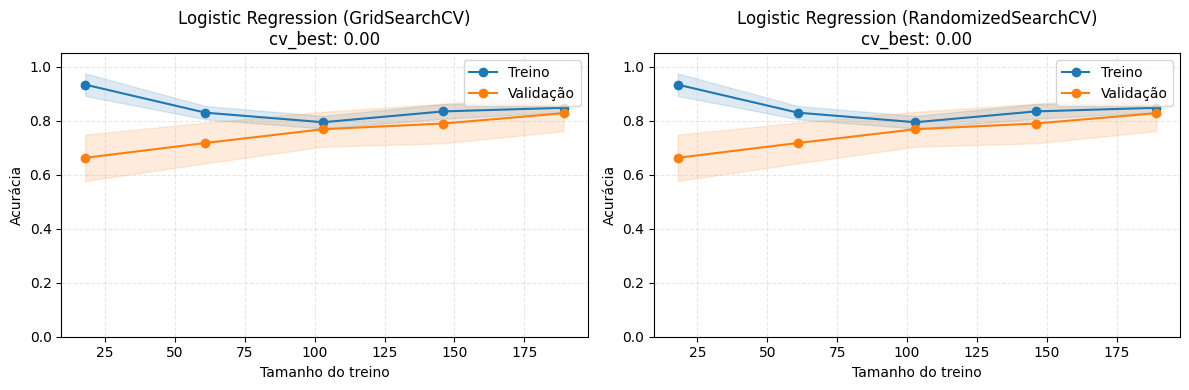


Random Forest
GridSearchCV -> best cv score: 0.80 | test score: 0.87
GridSearchCV -> best params: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
RandomizedSearchCV -> best cv score: 0.80 | test score: 0.87
RandomizedSearchCV -> best params: {'n_estimators': 200, 'max_features': 'log2', 'max_depth': None}


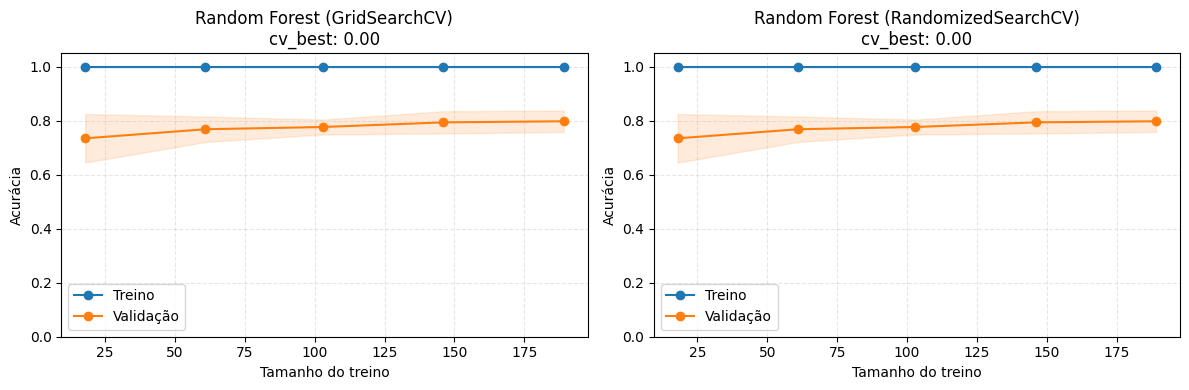


Gradient Boosting
GridSearchCV -> best cv score: 0.78 | test score: 0.78
GridSearchCV -> best params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
RandomizedSearchCV -> best cv score: 0.78 | test score: 0.78
RandomizedSearchCV -> best params: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01}


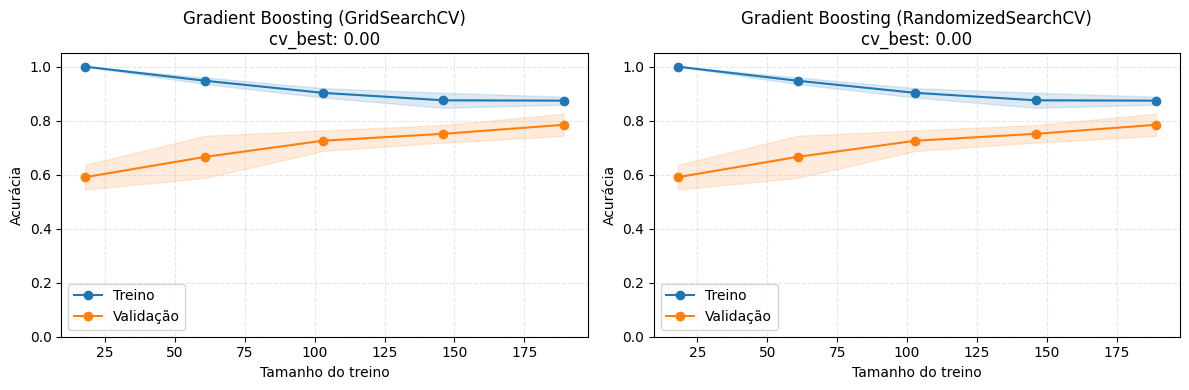


SVM
GridSearchCV -> best cv score: 0.81 | test score: 0.90
GridSearchCV -> best params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
RandomizedSearchCV -> best cv score: 0.81 | test score: 0.90
RandomizedSearchCV -> best params: {'kernel': 'linear', 'gamma': 'scale', 'C': 1}


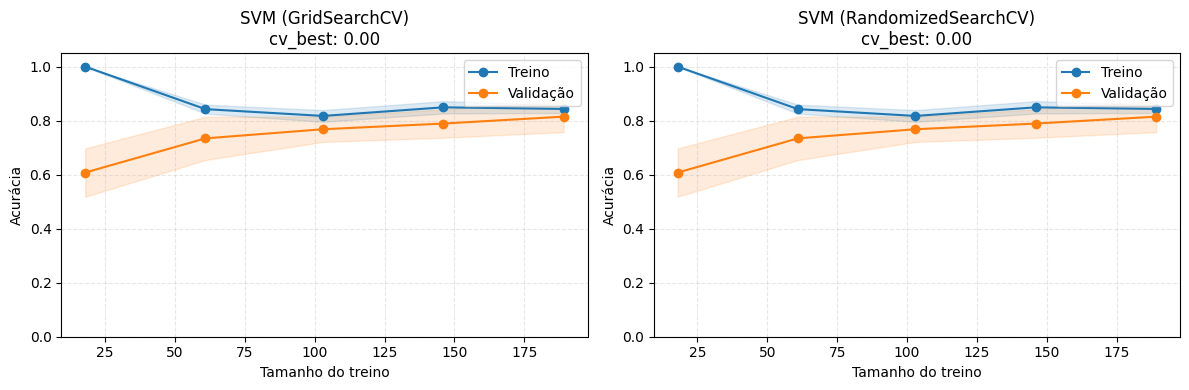


KNN


c:\Users\luis claudio\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


GridSearchCV -> best cv score: 0.68 | test score: 0.62
GridSearchCV -> best params: {'n_neighbors': 7, 'weights': 'uniform'}
RandomizedSearchCV -> best cv score: 0.68 | test score: 0.62
RandomizedSearchCV -> best params: {'weights': 'uniform', 'n_neighbors': 7}


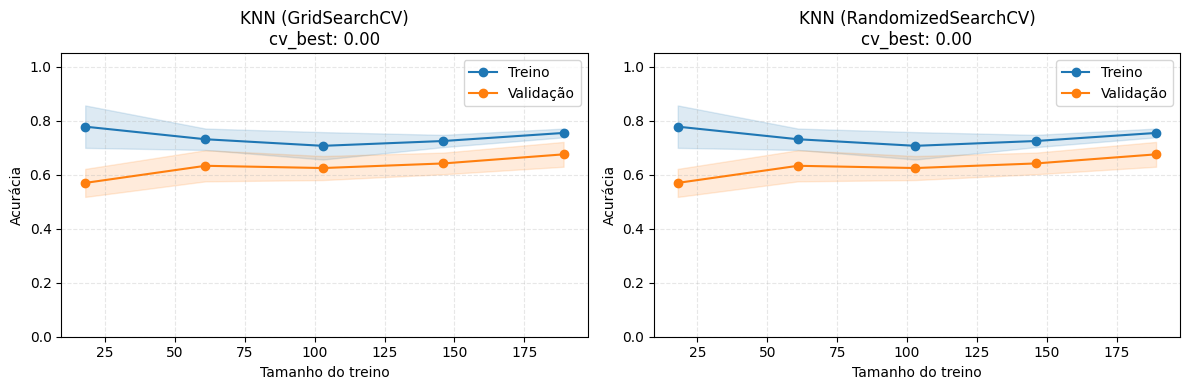


Hiperpar√¢metros finais por modelo (Grid / Randomized):
- Logistic Regression:
    GridSearchCV -> best_cv: 0.83 | test: 0.90 | params: {'C': 0.1, 'penalty': 'l2'}
    RandomizedSearchCV -> best_cv: 0.83 | test: 0.90 | params: {'penalty': 'l2', 'C': 0.1}
- Random Forest:
    GridSearchCV -> best_cv: 0.80 | test: 0.87 | params: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
    RandomizedSearchCV -> best_cv: 0.80 | test: 0.87 | params: {'n_estimators': 200, 'max_features': 'log2', 'max_depth': None}
- Gradient Boosting:
    GridSearchCV -> best_cv: 0.78 | test: 0.78 | params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
    RandomizedSearchCV -> best_cv: 0.78 | test: 0.78 | params: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01}
- SVM:
    GridSearchCV -> best_cv: 0.81 | test: 0.90 | params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
    RandomizedSearchCV -> best_cv: 0.81 | test: 0.90 | params: {'kernel': 'linear', 'gamma': 'scale', 'C'

In [30]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, learning_curve
import numpy as np
import pandas as pd

# Hiperpar√¢metros: GridSearchCV vs RandomizedSearchCV + Learning Curves lado a lado
import matplotlib.pyplot as plt

# Defini√ß√£o dos modelos e espa√ßos de busca
estimators = {
    "Logistic Regression": {
        "est": LogisticRegression(solver='liblinear', max_iter=1000, random_state=42),
        "grid": {"C": [0.01, 0.1, 1, 10], "penalty": ["l1", "l2"]},
        "rand_dist": {"C": [0.01, 0.1, 1, 10], "penalty": ["l1", "l2"]}
    },
    "Random Forest": {
        "est": RandomForestClassifier(random_state=42),
        "grid": {"n_estimators": [50, 100, 200], "max_depth": [None, 5, 10], "max_features": ["sqrt", "log2"]},
        "rand_dist": {"n_estimators": [50, 100, 200], "max_depth": [None, 5, 10], "max_features": ["sqrt", "log2"]}
    },
    "Gradient Boosting": {
        "est": GradientBoostingClassifier(random_state=42),
        "grid": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5]},
        "rand_dist": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5]}
    },
    "SVM": {
        "est": SVC(probability=True, random_state=42),
        "grid": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"], "gamma": ["scale", "auto"]},
        "rand_dist": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"], "gamma": ["scale", "auto"]}
    },
    "KNN": {
        "est": KNeighborsClassifier(),
        "grid": {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]},
        "rand_dist": {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]}
    }
}

results_summary = []

# par√¢metros comuns √†s buscas
search_kwargs = dict(cv=cv, scoring='accuracy', n_jobs=-1, verbose=0)

for name, cfg in estimators.items():
    print(f"\n{'='*60}\n{name}\n{'='*60}")
    est = cfg["est"]
    param_grid = cfg["grid"]
    param_rand = cfg["rand_dist"]

    # GridSearchCV
    grid = GridSearchCV(estimator=est, param_grid=param_grid, **search_kwargs)
    grid.fit(X_train, y_train)
    grid_best = grid.best_estimator_
    grid_best_score = grid.best_score_
    grid_test_score = grid_best.score(X_test, y_test)

    # RandomizedSearchCV (n_iter pequeno para tempo de execu√ß√£o)
    rand = RandomizedSearchCV(estimator=est, param_distributions=param_rand, n_iter=10, random_state=42, **search_kwargs)
    rand.fit(X_train, y_train)
    rand_best = rand.best_estimator_
    rand_best_score = rand.best_score_
    rand_test_score = rand_best.score(X_test, y_test)

    # Armazenar resumo bonito
    results_summary.append({
        "model": name,
        "search": "GridSearchCV",
        "best_cv_score": round(grid_best_score, 2),
        "test_score": round(grid_test_score, 2),
        "best_params": grid.best_params_
    })
    results_summary.append({
        "model": name,
        "search": "RandomizedSearchCV",
        "best_cv_score": round(rand_best_score, 2),
        "test_score": round(rand_test_score, 2),
        "best_params": rand.best_params_
    })

    # Exibir resultados detalhados por modelo
    print("GridSearchCV -> best cv score: {:.2f} | test score: {:.2f}".format(grid_best_score, grid_test_score))
    print("GridSearchCV -> best params:", grid.best_params_)
    print("RandomizedSearchCV -> best cv score: {:.2f} | test score: {:.2f}".format(rand_best_score, rand_test_score))
    print("RandomizedSearchCV -> best params:", rand.best_params_)

    # Learning Curves para os dois melhores estimadores (Grid x Random)
    train_sizes = np.linspace(0.1, 1.0, 5)
    plt.figure(figsize=(12, 4))

    for i, (label, estimator_best) in enumerate([("GridSearchCV", grid_best), ("RandomizedSearchCV", rand_best)]):
        train_sizes_abs, train_scores, val_scores = learning_curve(
            estimator_best, X_train, y_train, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1
        )
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)

        ax = plt.subplot(1, 2, i + 1)
        ax.plot(train_sizes_abs, train_mean, 'o-', color='tab:blue', label='Treino')
        ax.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.15, color='tab:blue')
        ax.plot(train_sizes_abs, val_mean, 'o-', color='tab:orange', label='Valida√ß√£o')
        ax.fill_between(train_sizes_abs, val_mean - val_std, val_mean + val_std, alpha=0.15, color='tab:orange')
        ax.set_title(f"{name} ({label})\ncv_best: {0:.2f}".format(grid_best_score if label=="GridSearchCV" else rand_best_score))
        ax.set_xlabel("Tamanho do treino")
        ax.set_ylabel("Acur√°cia")
        ax.set_ylim(0.0, 1.05)
        ax.grid(True, linestyle='--', alpha=0.3)
        ax.legend()

    plt.tight_layout()
    plt.show()

# Exibir resumo consolidado em tabela elegante
summary_df = pd.DataFrame(results_summary)
# Formatar melhor a coluna de par√¢metros como strings curtas
summary_df["best_params"] = summary_df["best_params"].apply(lambda p: str(p))
summary_df = summary_df[["model", "search", "best_cv_score", "test_score", "best_params"]]
#print("\nResumo consolidado (valores com 2 casas decimais):")
#display(summary_df.style.hide_index())

# Al√©m do resumo, mostrar para cada modelo os hiperpar√¢metros finais (melhor encontrados)
print("\nHiperpar√¢metros finais por modelo (Grid / Randomized):")
for model in estimators.keys():
    g = summary_df[(summary_df.model == model) & (summary_df.search == "GridSearchCV")].iloc[0]
    r = summary_df[(summary_df.model == model) & (summary_df.search == "RandomizedSearchCV")].iloc[0]
    print(f"- {model}:")
    print(f"    GridSearchCV -> best_cv: {g.best_cv_score:.2f} | test: {g.test_score:.2f} | params: {g.best_params}")
    print(f"    RandomizedSearchCV -> best_cv: {r.best_cv_score:.2f} | test: {r.test_score:.2f} | params: {r.best_params}")

*Tabela 9: Pepiline dos hiperpar√¢metros dos modelos KMN, Logistic Regression e Random Forest dados cl√≠nicos do dataset Heart Disease Cleveland*

*Grafico 14: learning curves dos hiperpar√¢metros dos modelos KMN, Logistic Regression e Random Forest dados cl√≠nicos do dataset Heart Disease Cleveland*

Analisando a Tabela 9 e o gr√°fico 14, temos:

1. Utilizou-se as t√©cnicas GridSearchCV e RandomizedSearchCV para explorar a melhor combina√ß√£o dos modelos com ajustes de hiperpar√¢metros;
2. Foi ajustado os modelos abaixo com os seguintes hiperpar√¢metros:
Hiperpar√¢metros finais por modelo (Grid / Randomized):
- **Logistic Regression:
    GridSearchCV -> best_cv: 0.83 | test: 0.90 | params: {'C': 0.1, 'penalty': 'l2'}
    RandomizedSearchCV -> best_cv: 0.83 | test: 0.90 | params: {'penalty': 'l2', 'C': 0.1}**
- **Random Forest:
    GridSearchCV -> best_cv: 0.80 | test: 0.87 | params: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
    RandomizedSearchCV -> best_cv: 0.80 | test: 0.87 | params: {'n_estimators': 200, 'max_features': 'log2', 'max_depth': None}**
- **Gradient Boosting:
    GridSearchCV -> best_cv: 0.78 | test: 0.78 | params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
    RandomizedSearchCV -> best_cv: 0.78 | test: 0.78 | params: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01}**
- **SVM:
    GridSearchCV -> best_cv: 0.81 | test: 0.90 | params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
    RandomizedSearchCV -> best_cv: 0.81 | test: 0.90 | params: {'kernel': 'linear', 'gamma': 'scale', 'C': 1}**
- **KNN:
    GridSearchCV -> best_cv: 0.68 | test: 0.62 | params: {'n_neighbors': 7, 'weights': 'uniform'}
    RandomizedSearchCV -> best_cv: 0.68 | test: 0.62 | params: {'weights': 'uniform', 'n_neighbors': 7}**


-> Para Logistic Regression, Random Forest, Gradient Boosting e SVM
O CV score (0.83; 0.80; 0.78; 0.81) √© menor ou igual ao test score (0.90; 0.87; 0.78; 0.90).
Isso indica que n√£o h√° ind√≠cio de overfitting ‚Äî ou seja, o desempenho no teste n√£o √© pior que o desempenho m√©dio nos folds de valida√ß√£o.

-> Para KNN
O CV score (0.68) √© maior que o test score (0.62) e s√£o muito baixos
Esse gap de 0.06 sugere que o modelo n√£o aprendeu bem aos padr√µes dos dados, podendo indicar problema de underffiting e um leve problema de overfitting (CV score maior que o test score)

3. Analisaremos os gr√°ficos Learning Curve para verificar poss√≠veis problemas de overfitting e underffiting:

üîπ Logistic Regression

- Treino: ~0.92 ‚Üí 0.85, Valida√ß√£o: ~0.66 ‚Üí 0.83
- Observa√ß√£o: O gap inicial entre treino e valida√ß√£o √© um pouco grande, mas conforme o tamanho do treino aumenta, a valida√ß√£o sobe e se aproxima do treino.
- Conclus√£o: N√£o h√° overfitting relevante. Modelo n√£o underfit, pois ambos convergem em alta acur√°cia.

üîπ Random Forest
- Treino: ~1.0 (sempre alto)
- Valida√ß√£o: ~0.74 ‚Üí 0.81
- Observa√ß√£o: Treino perfeito ‚Üí modelo decorou os dados (sinal t√≠pico de overfitting no treino). Valida√ß√£o menor, mas melhora com mais dados.

Conclus√£o: Overfitting leve a moderado, mas generaliza√ß√£o ainda aceit√°vel. N√£o h√° underfitting, pois o modelo tem alta capacidade.

üîπ Gradient Boosting

- Treino: 1.0 ‚Üí 0.88
- Valida√ß√£o: 0.60 ‚Üí 0.78
- Observa√ß√£o: Gap inicial grande entre treino e valida√ß√£o. Treino diminui, valida√ß√£o aumenta com mais dados.
- Conclus√£o: Gap sugere underfitting inicial, modelo ainda n√£o aprendeu completamente. Pode melhorar aumentando n_estimators ou learning_rate.

üîπ SVM (linear)

- Treino: ~1.0 ‚Üí 0.85
- Valida√ß√£o: ~0.61 ‚Üí 0.82
- Observa√ß√£o: Treino mais alto que valida√ß√£o ‚Üí gap vis√≠vel no in√≠cio. Conforme aumenta dados, treino e valida√ß√£o se aproximam.
- Conclus√£o: Leve overfitting no in√≠cio, mas se corrige com mais dados. No fim, generaliza√ß√£o boa ‚Üí n√£o underfit.

üîπ KMN

- Treino: 0.8 ‚Üí 0.7
- Valida√ß√£o: 0.60 ‚Üí 0.7
- Observa√ß√£o: Gap inicial grande entre treino e valida√ß√£o. Treino diminui, valida√ß√£o aumenta com mais dados.
- Conclus√£o: Gap sugere underfitting inicial, modelo ainda n√£o aprendeu completamente. Pode melhorar aumentando n_estimators ou learning_rate.


